## 1. Import Pandas, Read Dataset serta Melakukan Sedikit Eksplorasi Dataset dengan Pandas

In [1]:
# Import Library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Metrics prediksi yang akan digunakan

In [2]:
# Read dataset dari local device
data_stok = pd.read_excel("Data Persediaan Stok Kopi Krintji dari Bulan Juli - November 2021.xlsx", 
                          sheet_name = "Data Penjualan")
data_stok.head()

,No,Date,Item Name,Item Variant Name,Category Name,SKU,price,Item Sold,Item Refunded,Gross Sales
0,1,2021-07-01,Aglio Olio sambel bawang,0,Mie,NaN,21000,17,0,357000
1,2,2021-07-01,Ayam,Ayam goreng tepung,Lauk,NaN,3000,9,0,27000
2,3,2021-07-01,Bali kintamani,0,kopi single,NaN,20000,10,0,200000
3,4,2021-07-01,Cheese cream drinks,Thai cream cheese,kopi di krintji,NaN,20000,8,0,160000
4,5,2021-07-01,Pisang original,Goreng,Cemilan,NaN,15000,11,0,165000


In [3]:
# Melihat ukuran dataframe seperti jumlah baris data dan kolom
data_stok.shape

(2000, 10)

Berdasarkan hasil output diatas dapat diketahui bahwasanya data_stok memiliki 10 kolom dengan masing-masing kolom terisi sebanyak 2000 baris data.

In [4]:
# Melihat tipe data dari masing-masing kolom yang ada di data_stok
data_stok.dtypes

No                            int64
Date                 datetime64[ns]
Item Name                    object
Item Variant Name            object
Category Name                object
SKU                         float64
price                         int64
Item Sold                     int64
Item Refunded                 int64
Gross Sales                   int64
dtype: object

Berdasarkan hasil output diatas dapat diketahui bahwasanya data_stok memiliki 4 tipe data yang berbeda yakni:

- Integer.
- datetime.
- object/string.
- float.

In [5]:
# Melihat jumlah baris data yang dimiliki oleh masing-masing kolom di data_stok
data_stok.count()

No                   2000
Date                 2000
Item Name            2000
Item Variant Name    2000
Category Name        2000
SKU                     0
price                2000
Item Sold            2000
Item Refunded        2000
Gross Sales          2000
dtype: int64

Hasil output diatas menunjukkan bahwa 9 kolom dalam data_stok semuanya diisi sebanyak 2000 data sedangkan 1 kolom yang bernama "SKU" tidak terisi data atau yang biasa dikenal sebagai nilai NaN (Not a Number).

In [6]:
# Memeriksa nilai kosong pada data_stok
data_stok.isnull().sum()

No                      0
Date                    0
Item Name               0
Item Variant Name       0
Category Name           0
SKU                  2000
price                   0
Item Sold               0
Item Refunded           0
Gross Sales             0
dtype: int64

In [7]:
# Melihat segala informasi yang ada di dalam data_stok
data_stok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   No                 2000 non-null   int64         
 1   Date               2000 non-null   datetime64[ns]
 2   Item Name          2000 non-null   object        
 3   Item Variant Name  2000 non-null   object        
 4   Category Name      2000 non-null   object        
 5   SKU                0 non-null      float64       
 6   price              2000 non-null   int64         
 7   Item Sold          2000 non-null   int64         
 8   Item Refunded      2000 non-null   int64         
 9   Gross Sales        2000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 156.4+ KB


Terlihat pada informasi dari dataframe data_stok didapatkan beberapa informasi penting seperti pada kolom "SKU" yang tidak memiliki data (data kosong/data NaN). Selain kolom "SKU" juga terdapat kolom yang memiliki nilai kosong. Kolom tersebut adalah "Item Refunded" yang walaupun berdasarkan informasi di dalam data_stok bahwasanya kolom "Item Refunded" tidak memiliki nilai NaN/nilai kosong tetapi kolom ini hanya memiliki nilai 0 saja. Hal tersebut terbukti ketika pada saat saya memanggil dataset ini ke dalam pengujian dengan memperlihatkan susunan data sebanyak 5 teratas.

Selain itu informasi dari kedua kolom tersebut (kolom "Item Refunded" dan kolom "SKU"), terdapat juga informasi dari beberapa kolom seperti tipe data string (object) yang dimiliki oleh kolom "Item Name", "Item Variant Name", dan "Category Name". Kemudian tipe datetime yang dimiliki oleh kolom "Date". Sedangkan tipe data integer dimiliki oleh kolom "No", "price", "Item Sold", dan "Gross Sales".

Kemudian informasi selanjutnya adalah bahwa jumlah baris dari data_krintji yang mencapai 2000 baris dengan 10 kolom yang 8 kolomnya tidak memiliki nilai NaN (nilai kosong) selain kolom "SKU" dan kolom "Item Refunded" yang pada akhirnya kedua kolom ini akan saya hapus pada saat di tahapan preprocessing data.

In [8]:
# Melihat tipe data integer saja dari data_stok sedangkan tipe data yang lain tidak diperlihatkan
data_stok.select_dtypes(include=["int64"]).head()

,No,price,Item Sold,Item Refunded,Gross Sales
0,1,21000,17,0,357000
1,2,3000,9,0,27000
2,3,20000,10,0,200000
3,4,20000,8,0,160000
4,5,15000,11,0,165000


In [9]:
# Melihat tipe data berupa datetime dan float dari data_stok sedangkan untuk tipe data string/integer tidak diperlihatkan
data_stok.select_dtypes(exclude=["float64", "datetime64"]).head()

,No,Item Name,Item Variant Name,Category Name,price,Item Sold,Item Refunded,Gross Sales
0,1,Aglio Olio sambel bawang,0,Mie,21000,17,0,357000
1,2,Ayam,Ayam goreng tepung,Lauk,3000,9,0,27000
2,3,Bali kintamani,0,kopi single,20000,10,0,200000
3,4,Cheese cream drinks,Thai cream cheese,kopi di krintji,20000,8,0,160000
4,5,Pisang original,Goreng,Cemilan,15000,11,0,165000


In [10]:
# Mengecek nilai duplikat di dalam data_stok
data_stok.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

Berdasarkan hasil output diatas didapatkan kesimpulan bahwa di dalam dataframe data_stok tidak memiliki nilai duplikat antar 1 baris (nilai yang sama atau identik) dengan baris yang lain.

In [11]:
# Melihat nilai korelasi data antar kolom yang bersifat numerik
data_stok.corr()

,No,SKU,price,Item Sold,Item Refunded,Gross Sales
No,1.000000,NaN,-0.058203,0.046880,NaN,0.000860
SKU,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.058203,NaN,1.000000,0.018225,NaN,0.569261
Item Sold,0.046880,NaN,0.018225,1.000000,NaN,0.805157
Item Refunded,NaN,NaN,NaN,NaN,NaN,NaN
Gross Sales,0.000860,NaN,0.569261,0.805157,NaN,1.000000


Berdasarkan hasil keluaran diatas dapat diambil beberapa kesimpulan seperti yang ada dibawah ini:

1. Nilai korelasi di kolom "price" dengan indeks kolom "No" adalah -0.058 yang berarti kedua kolom ini tidak memiliki hubungan timbal balik yang bagus sedangkan kolom "price" dengan indeks kolom "Gross Sales" adalah 057 yang berarti kedua kolom ini memiliki hubungan timbal balik yang bagus.
2. Nilai korelasi di kolom "Item Sold" dengan indeks kolom "price" adalah 0.018 yang berarti kedua kolom ini tidak terlalu memiliki hubungan timbal balik yang bagus sedangkan kolom "Item Sold" dengan indeks kolom "Gross Sales" adalah 0.81 yang berarti kedua kolom ini memiliki hubungan timbal balik yang sangat bagus.


Dengan mengetahui nilai korelasi atau nilai hubungan keterkaitan antar masing-masing kolom dapat membuat kita mengetahui hubungan mana yang bagus dan hubungan nilai mana yang tidak bagus dan dengan mengetahui nilai korelasi juga dapat menghindari kita dalam melakukan pengujian dengan mamasukkan variabel/kolom yang tidak memiliki hubungan dengan label target. Intinya jika ingin melihat korelasi antara masing-masing kolom maka nilai dari masing-masing kolom tersebut harus dibandingkan dengan indeks (terletak disamping kiri).

In [12]:
# Melihat nilai-nilai statistik dari data_stok khususnya kolom yang bersifat numerik
data_stok.describe()

,No,SKU,price,Item Sold,Item Refunded,Gross Sales
count,2000.000000,0.0,2000.00000,2000.000000,2000.0,2.000000e+03
mean,1000.500000,NaN,18607.50000,18.300000,0.0,3.411190e+05
std,577.494589,NaN,4870.24675,6.782994,0.0,1.611127e+05
min,1.000000,NaN,3000.00000,3.000000,0.0,1.800000e+04
25%,500.750000,NaN,18000.00000,13.000000,0.0,2.160000e+05
50%,1000.500000,NaN,20000.00000,19.000000,0.0,3.360000e+05
75%,1500.250000,NaN,20000.00000,24.000000,0.0,4.500000e+05
max,2000.000000,NaN,49000.00000,56.000000,0.0,1.680000e+06


Berdasarkan hasil diatas dapat diketahui nilai-nilai statistik dari 4 kolom (kolom "SKU" dan "Item Refunded" tidak dihitung karena tidak memiliki nilai) seperti kolom "No", "price", "Item Sold", dan kolom "Gross Sales". Alasan kenapa keempat kolom ini saja yang terlihat nilai statistiknya sedangkan kolom seperti "Date", "Item Name", "Item Variant Name", dan "Category Name" tidak terlihat dikarenakan keempat kolom tersebut bersifat kategorik dan datetime sedangkan kolom seperti "No", "price, "Item Sold", dan "Gross Sales" merupakan kolom yang bersifat numerik. Data yang bersifat kategorik merupakan data yang memiliki tipe data string. Tipe data datetime merupakan data yang memiliki format data seperti tanggal. Sedangkan data yang bersifat numerik merupakan data yang memiliki tipe data integer & float. Jika ingin melihat statistik deskriptif pada kolom kategorik dapat menggunakan cara:

- data_krintji.describe(include="O").

- Atau data_krintji.describe(include="all") jika ingin melihat statistik deskriptif untuk keseluruhan kolom.

Selain itu pada nilai deskriptif diatas memiliki beberapa nilai yang bermacam-macam seperti nilai mean (nilai rata-rata dari suatu kolom), nilai standard deviasi (std), nilai total (count), nilai minimum (min), nilai maximum (max), nilai quartil 1 (25%), nilai quartil 2 (50% atau biasa yang dikenal sebagai nilai median), dan nilai quartil 3 (75%). Sedangkan untuk membaca nilai statistik berdasarkan kolom numerik diatas yaitu sebagai berikut:

1. Kolom "price" memiliki nilai minimum yakni 3.000 sedangkan nilai maximumnya adalah 49.000. Kolom "price"juga memiliki nilai rata-rata (mean) yaitu sebesar 18.608 dengan nilai standard deviasi yakni 4.870. Selain keempat nilai tersebut (nilai minimum, maximum, mean, standard deviasi), kolom "price" juga memiliki nilai quartil. Pada quartil 1 nilai di kolom "price" adalah 18.000 sedangkan untuk quartil 2/nilai median dan juga quartil 3 memiliki nilai yang sama yakni 20.000.
2. Kemudian kolom "Item Sold" memiliki nilai minimum yakni 3.000 sedangkan nilai maximumnya adalah 56.000. Sedangkan untuk nilai mean dari kolom ini adalah 18 dan nilai standard deviasinya adalah 7. Selain keempat nilai tersebut, kolom "Item Sold" juga memiliki nilai quartil. Pada quartil 1 nilai di kolom "Item Sold" ini adalah 13, nilai quartil 2/nilai median adalah 19, dan nilai quartil terakhir yakni quartil 3 memiliki nilai 24.
3. Dan kolom terakhir yang memiliki nilai deskriptif di data numerik ini adalah kolom "Gross Sales". Kolom "Gross Sales" memiliki nilai minimum yakni 18.000 sedangkan nilai maximumnya adalah 1.680.000. Sedangkan untuk nilai mean dari kolom "Gross Sales" adalah 341.119 dan nilai standard deviasinya adalah 161.113. Selain keempat nilai tersebut, kolom "Gross Sales" juga memiliki nilai quartil. Pada quartil 1 nilai di kolom "Gross Sales" ini adalah 216.000. Lalu nilai quartil 2/nilai median di kolom "Gross Sales" adalah 336.000 dan nilai quartil terakhir yakni quartil 3 yang memiliki nilai 450.000.

In [13]:
# Melihat nilai statistik untuk kolom yang memiliki tipe data string/object (data yang bersifat kategorik)
data_stok.describe(include="O")

,Item Name,Item Variant Name,Category Name
count,2000,2000,2000
unique,114,37,23
top,Es kopi susu gadis,0,Cemilan
freq,147,903,373


Berbeda dari nilai deskriptif pada data yang bersifat numerik yang menampilkan nilai seperti mean, standard deviasi, maximum, minimum, dan nilai quartil, nilai deskriptif pada data yang bersifat kategorik memiliki nilai seperti unique, top, dan freq yang tentunya masing-masing kolom kategorik ini memiliki nilai yang berbeda-beda. Berikut adalah penjelasannya:

1. Nilai unique pada kolom "Item Name" berjumlah 114. Kemudian pada kolom "Item Variant Name" memiliki total nilai unique berjumlah 37. Dan terakhir adalah kolom "Category Name" yang memiliki nilai unique berjumlah 23.
2. Nilai top pada kolom "Item Name" adalah Es kopi susu gadis. Kemudian pada kolom "Item Variant Name" memiliki nilai top yakni 0. Sedangkan di kolom "Category Name" memiliki nilai top yakni cemilan.
3. Dan nilai deskriptif terakhir untuk data yang bersifat kategorik yakni nilai freq. Di kolom "Item Name", nilai freq berjumlah 147. Kemudian pada kolom "Item Variant Name" memiliki nilai freq sebesar 903. Sedangkan nilai freq pada kolom "Category Name" berjumlah 373.

## 2. Data Preprocessing

In [15]:
# Melihat informasi di dalam data_stok
data_stok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   No                 2000 non-null   int64         
 1   Date               2000 non-null   datetime64[ns]
 2   Item Name          2000 non-null   object        
 3   Item Variant Name  2000 non-null   object        
 4   Category Name      2000 non-null   object        
 5   SKU                0 non-null      float64       
 6   price              2000 non-null   int64         
 7   Item Sold          2000 non-null   int64         
 8   Item Refunded      2000 non-null   int64         
 9   Gross Sales        2000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 156.4+ KB


In [17]:
# Mengganti nama kolom "price" menjadi "Price"
data_stok = data_stok.rename(columns={"price": "Price"})

In [18]:
# Menghapus kolom "SKU" dan "Item Refunded" karena tidak diperlukan dalam pengolahan data
data_stok.drop(["No", "SKU", "Item Refunded"], axis = 1, inplace = True)

data_stok.head()

,Date,Item Name,Item Variant Name,Category Name,Price,Item Sold,Gross Sales
0,2021-07-01,Aglio Olio sambel bawang,0,Mie,21000,17,357000
1,2021-07-01,Ayam,Ayam goreng tepung,Lauk,3000,9,27000
2,2021-07-01,Bali kintamani,0,kopi single,20000,10,200000
3,2021-07-01,Cheese cream drinks,Thai cream cheese,kopi di krintji,20000,8,160000
4,2021-07-01,Pisang original,Goreng,Cemilan,15000,11,165000


In [19]:
# Copy dataframe, agar dataframe yang asli aman incase terlalu banyak percobaan yang out of control
data_stok_olah = data_stok.copy()

In [20]:
# Menjumlahkan Total Penjualan per Bulan berdasarkan Item Name dan diurutkan dari yang terendah ke tertinggi
data_stok_olah_totalPenjualanPerBulan = data_stok_olah.groupby(data_stok_olah["Date"].dt.strftime("%B")
                                                              )["Item Sold"].sum().sort_values()
data_stok_olah_totalPenjualanPerBulan

Date
August       6613
July         6923
September    7205
November     7244
October      8615
Name: Item Sold, dtype: int64

Berdasarkan hasil output diatas dapat diketahui bahwasanya pada bulan Agustus 2021 memiliki tingkat penjualan menu yang paling rendah jika dibandingkan dengan bulan Juli 2021 ataupun September 2021 dikarenakan bulan Agustus 2021 hanya memiliki total penjualan sebanyak 6.613 menu. Tetapi walaupun 6.613 sudah termasuk banyak dalam sisi penjualan dan menguntungkan tetap saja tidak menghapus fakta bahwa bulan Agustus 2021 memiliki total penjualan paling rendah selama tahun 2021.

Sedangkan bulan Oktober 2021 memiliki total penjualan paling tinggi dibandingkan pesaing terdekatnya yakni bulan November dalam sisi penjualan menu di kedai kopi krintji. Bahkan total penjualan di bulan Oktober mencapai 8.615 menu sedangkan bulan November hanya mencapai 7.244 sehingga memiliki selisih penjualan sebanyak 1.371.

In [21]:
# Jumlah Total Penjualan per Bulan berdasarkan Menu (Item Name) dari Bulan Juli sampai November 2021
data_stok_olah_allTime = data_stok_olah.set_index("Date").groupby(
    "Item Name").sum().reset_index().sort_values("Item Sold", ascending = False)
data_stok_olah_allTime

,Item Name,Price,Item Sold,Gross Sales
14,Es kopi susu gadis,2646000,2861,51498000
0,Aglio Olio sambel bawang,2037000,1881,39501000
2,Bali kintamani,1480000,1331,26620000
25,Kentang Goreng,1110000,1319,19785000
4,Cheese cream drinks,1260000,1182,23640000
...,...,...,...,...
67,Saus Telur Asin,3000,11,33000
20,Green tea (botol),22000,9,198000
66,Sambel Matah,3000,6,18000
83,affogato,18000,6,108000


Dapat dilihat dari hasil output diatas diketahui bahwa menu yang bernama Es kopi susu gadis memiliki jumlah penjualan paling tinggi selama rentang waktu dari bulan Juli - November 2021 yang dimana total penjualannya mencapai 2.861 menu setiap transaksi. Selain menu Es kopi susu gadis terdapat juga menu Aglio Olio sambel bawang yang memiliki jumlah penjualan tertinggi kedua dengan total penjualan mencapai 1.881 menu selama bulan Juli -  November 2021.

Sedangkan untuk menu yang memiliki jumlah penjualan paling rendah selama bulan Juli - November 2021 adalah menu yang bernama extra cheese dengan jumlah penjualan hanya mencapai 5 kali transaksi saja.

In [22]:
# Jumlah Total Penjualan per Bulan berdasarkan Category Name dalam periode Bulan Juli - November 2021
data_stok_olah_PenjualanPerKategori = data_stok_olah.set_index("Date").groupby(
    "Category Name").sum().reset_index().sort_values("Item Sold", ascending = False)
data_stok_olah_PenjualanPerKategori

,Category Name,Price,Item Sold,Gross Sales
0,Cemilan,6728000,6924,124972000
18,kopi di krintji,6110000,5978,115154000
4,Mie,4056000,4344,79755000
20,kopi single,3720000,3329,66580000
12,bukan kopi,3343000,3190,58168000
7,Roti,3334000,2906,60572000
5,Nasi,2833000,1903,51636000
19,kopi klasik,1853000,1876,30931000
2,Lauk,189000,1173,3519000
1,Karbo ( Nasi/Mie ),1175000,946,20514000


Berdasarkan hasil output diatas diketahui bahwa kategori menu yang bernama Cemilan memiliki total penjualan tertinggi yang ada selama bulan Juli - November 2021 dengan jumlah penjualan yang mencapai 6.924 kategori. Selain kategori Cemilan juga terdapat kategori yang memiliki total penjualan tertinggi kedua yang bernama kopi di krintji dengan jumlah penjualan mencapai 5.978.

Sedangkan untuk kategori menu yang memiliki jumlah penjualan paling rendah selama bulan Juli - November 2021 adalah kategori yang bernama cold brew yang hanya memiliki total penjualan sebanyak 12 saja.

In [23]:
# Total Penjualan per Menu pada Bulan Juli
jul_mask = data_stok_olah["Date"].map(lambda x: x.month) == 7
data_stok_olah_juli = data_stok_olah[jul_mask].set_index("Date").groupby(
    [pd.Grouper(freq="M"), "Item Name"]).sum().reset_index().sort_values("Item Sold", ascending = False)

data_stok_olah_juli

,Date,Item Name,Price,Item Sold,Gross Sales
14,2021-07-31,Es kopi susu gadis,540000,636,11448000
0,2021-07-31,Aglio Olio sambel bawang,462000,458,9618000
4,2021-07-31,Cheese cream drinks,320000,314,6280000
2,2021-07-31,Bali kintamani,260000,233,4660000
57,2021-07-31,Roti Bakar,180000,215,3225000
...,...,...,...,...,...
70,2021-07-31,cafe latte,19000,10,190000
33,2021-07-31,Mie goreng,10000,10,100000
55,2021-07-31,Regal irish cream,20000,8,160000
68,2021-07-31,ayam,3000,8,24000


In [24]:
# Total Penjualan per Menu pada Bulan Agustus
aug_mask = data_stok_olah["Date"].map(lambda x: x.month) == 8
data_stok_olah_agustus = data_stok_olah[aug_mask].set_index("Date").groupby(
    [pd.Grouper(freq="M"), "Item Name"]).sum().reset_index().sort_values("Item Sold", ascending = False)

data_stok_olah_agustus

,Date,Item Name,Price,Item Sold,Gross Sales
13,2021-08-31,Es kopi susu gadis,558000,535,9630000
0,2021-08-31,Aglio Olio sambel bawang,462000,383,8043000
22,2021-08-31,Kentang Goreng,270000,298,4470000
2,2021-08-31,Bali kintamani,320000,262,5240000
4,2021-08-31,Cheese cream drinks,280000,242,4840000
...,...,...,...,...,...
72,2021-08-31,chili fries,19000,10,190000
57,2021-08-31,Singkong goreng,18000,9,162000
44,2021-08-31,Nasi goreng,27000,9,243000
63,2021-08-31,Taro,18000,9,162000


In [25]:
# Total Penjualan per Menu pada Bulan September
sep_mask = data_stok_olah["Date"].map(lambda x: x.month) == 9
data_stok_olah_september = data_stok_olah[sep_mask].set_index("Date").groupby(
    [pd.Grouper(freq="M"), "Item Name"]).sum().reset_index().sort_values("Item Sold", ascending = False)

data_stok_olah_september

,Date,Item Name,Price,Item Sold,Gross Sales
11,2021-09-30,Es kopi susu gadis,522000,507,9126000
0,2021-09-30,Aglio Olio sambel bawang,315000,252,5292000
2,2021-09-30,Bali kintamani,260000,230,4600000
26,2021-09-30,Kulit Goreng,220000,205,4100000
56,2021-09-30,Roti Bakar,180000,202,3030000
...,...,...,...,...,...
17,2021-09-30,Green tea (botol),22000,9,198000
84,2021-09-30,chili fries,19000,9,171000
5,2021-09-30,Chicken melt,30000,8,240000
59,2021-09-30,Sambel Matah,3000,6,18000


In [26]:
# Total Penjualan per Menu pada Bulan Oktober
okt_mask = data_stok_olah["Date"].map(lambda x: x.month) == 10
data_stok_olah_oktober = data_stok_olah[okt_mask].set_index("Date").groupby(
    [pd.Grouper(freq="M"), "Item Name"]).sum().reset_index().sort_values("Item Sold", ascending = False)

data_stok_olah_oktober

,Date,Item Name,Price,Item Sold,Gross Sales
12,2021-10-31,Es kopi susu gadis,540000,634,11412000
0,2021-10-31,Aglio Olio sambel bawang,399000,414,8694000
17,2021-10-31,Kentang Goreng,270000,350,5250000
22,2021-10-31,Kulit Goreng,380000,349,6980000
2,2021-10-31,Bali kintamani,320000,281,5620000
...,...,...,...,...,...
54,2021-10-31,Sambel Geprek,3000,12,36000
75,2021-10-31,kopi hitam,16000,11,176000
6,2021-10-31,Cuanki,15000,11,165000
40,2021-10-31,Nasi jeruk SEI sapi,30000,10,300000


In [27]:
# Total Penjualan per Menu pada Bulan November
nov_mask = data_stok_olah["Date"].map(lambda x: x.month) == 11
data_stok_olah_november = data_stok_olah[nov_mask].set_index("Date").groupby(
    [pd.Grouper(freq="M"), "Item Name"]).sum().reset_index().sort_values("Item Sold", ascending = False)

data_stok_olah_november

,Date,Item Name,Price,Item Sold,Gross Sales
13,2021-11-30,Es kopi susu gadis,486000,549,9882000
0,2021-11-30,Aglio Olio sambel bawang,399000,374,7854000
2,2021-11-30,Bali kintamani,320000,325,6500000
18,2021-11-30,Kentang Goreng,210000,296,4440000
3,2021-11-30,Beef burger,350000,293,7325000
...,...,...,...,...,...
61,2021-11-30,chili fries,19000,11,209000
62,2021-11-30,coklat susu,18000,11,198000
42,2021-11-30,Piccolo,15000,11,165000
35,2021-11-30,Nasi Goreng,27000,10,270000


In [28]:
# Melihat data kosong di dalam data_stok_olah
data_stok.isnull().sum()

Date                 0
Item Name            0
Item Variant Name    0
Category Name        0
Price                0
Item Sold            0
Gross Sales          0
dtype: int64

In [29]:
# Melihat apakah di dalam data_stok_olah terdapat data yang terduplikat/tidak
data_stok.duplicated().sum()

0

In [30]:
# Melihat susunan data yang ada di dalam data_stok_olah sebanyak 15 teratas
data_stok.head(15)

,Date,Item Name,Item Variant Name,Category Name,Price,Item Sold,Gross Sales
0,2021-07-01,Aglio Olio sambel bawang,0,Mie,21000,17,357000
1,2021-07-01,Ayam,Ayam goreng tepung,Lauk,3000,9,27000
2,2021-07-01,Bali kintamani,0,kopi single,20000,10,200000
3,2021-07-01,Cheese cream drinks,Thai cream cheese,kopi di krintji,20000,8,160000
4,2021-07-01,Pisang original,Goreng,Cemilan,15000,11,165000
5,2021-07-01,Kulit Goreng,mix,Cemilan,20000,7,140000
6,2021-07-01,Daging sapi,Krispi,Lauk,3000,7,21000
7,2021-07-01,Es kopi susu gadis,original,kopi di krintji,18000,50,900000
8,2021-07-01,Flores Bajawa,0,kopi single,20000,19,380000
9,2021-07-01,Kopi Gadang,0,kopi di krintji,22000,20,440000


In [29]:
data_stok_olah = data_stok_olah.drop(["Date", "Item Name", "Item Variant Name", "Category Name"], axis=1)

data_stok_olah.columns

Index(['Price', 'Item Sold', 'Gross Sales'], dtype='object')

In [30]:
#data_stok_olah1 = data_stok_olah["Item Sold", "Gross Sales"]

res = np.isinf(data_stok_olah).values.sum()
print(res)

0


In [31]:
# Mengganti nilai infinite menjadi nilai NaN sebelum mengisi kembali dengan nilai mean

res = data_stok_olah.replace([np.inf, -np.inf], np.nan) # inf = nilai infinity yang positif sedangkan -inf = nilai infinity yang negatif

res.head()

,Price,Item Sold,Gross Sales
0,21000,17,357000
1,3000,9,27000
2,20000,10,200000
3,20000,8,160000
4,15000,11,165000


In [32]:
res.isnull().sum()

Price          0
Item Sold      0
Gross Sales    0
dtype: int64

## 3. Data Visualisasi

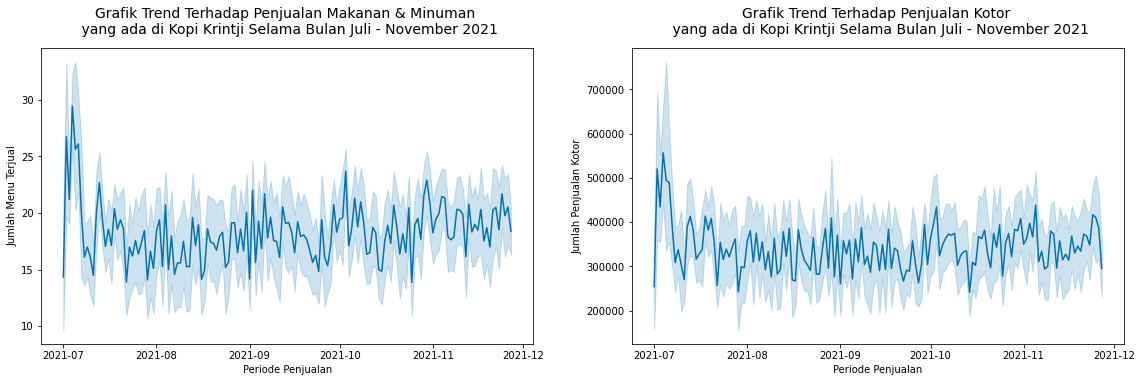

In [32]:
# Melihat trend penjualan makanan dan minuman beserta trend penjualan kotor selama periode bulan Juli - November 2021
plt.figure(figsize=(30, 25))

plt.subplot(4, 3, 1)
sns.lineplot(x="Date", y="Item Sold", data=data_stok)
plt.title("Grafik Trend Terhadap Penjualan Makanan & Minuman \n yang ada di Kopi Krintji Selama Bulan Juli - November 2021", 
          fontsize=14, pad=14)
plt.xlabel("Periode Penjualan")
plt.ylabel("Jumlah Menu Terjual")

plt.subplot(4, 3, 2)
sns.lineplot(x="Date", y="Gross Sales", data=data_stok)
plt.title("Grafik Trend Terhadap Penjualan Kotor \n yang ada di Kopi Krintji Selama Bulan Juli - November 2021", 
          fontsize=14, pad=14)
plt.xlabel("Periode Penjualan")
plt.ylabel("Jumlah Penjualan Kotor")
plt.show()

Berdasarkan grafik diatas dengan menunjukkan data deret waktu (time series) diketahui bahwasanya kedua grafik tersebut menunjukkan trend data selama periode dari bulan Juli - November 2021. Berikut adalah analisanya:

1. Berdasarkan grafik paling kiri menunjukkan trend data terkait menu yang berhasil dijual dalam setiap harinya dengan perhitungan bulan penjualan selama tahun 2021. Bulan-bulan tersebut yakni Juli, Agustus, September, Oktober, dan November. Menu yang memiliki tingkat penjualan tertinggi dan juga terendah semuanya terjadi di dalam bulan Juli 2021 hanya saja terdapat perbedaan harinya saja. Sedangkan bulan-bulan berikutnya cenderung mengalami kenaikan dan juga penurunan hanya saja tidak setinggi pada bulan Juli. Menurut analisa saya, kenaikan penjualan menu berada range angka 40 - 50 sedangkan penurunan penjualan yang ada pada bulan Juli berada di range 7 - 10 penjualan saja.
2. Grafik time series terakhir (paling kanan) menunjukkan trend data terhadap hasil penjualan kotor yang dapat juga dikatakan sebagai pendapatan kotor dari hasil perkalian antara kolom "Price" dengan kolom "Item Sold". Sama seperti pada grafik time series yang menunjukkan trend penjualan, trend penjualan kotor yang mengalami kenaikan total harga dan juga penurunan pendapatan berasal dari bulan Juli 2021 sedangkan bulan Agustus, September, Oktober, dan November 2021 juga mengalami kenaikan dan juga penurunan hanya saja tidak setinggi dan serendah bulan Juli. Menurut analisa saya tingkat penurunan terendah terhadap pendapatan kotor yang di dapatkan berada di range 150.000 sedangkan kenaikan pendapatan kotor tertinggi yang berhasil didapatkan berada di range yang lebih dari 700.000.

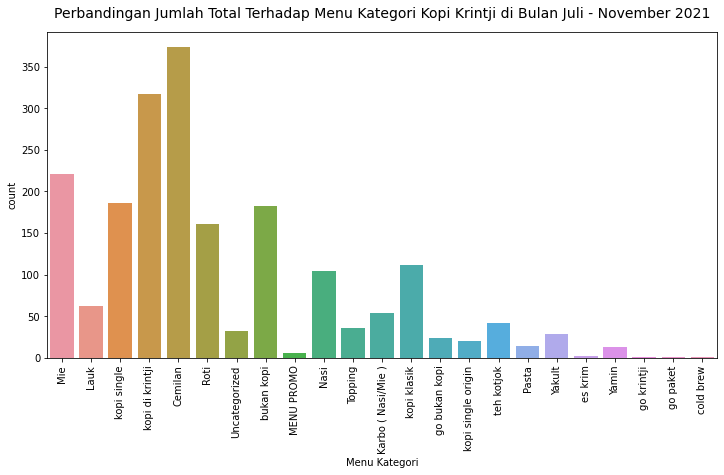

In [33]:
# Membandingkan jumlah total terkait kategori menu yang dijual di Kopi Krintji selama periode bulan Juli - November 2021
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

sns.countplot(x="Category Name", data=data_stok)
plt.title("Perbandingan Jumlah Total Terhadap Menu Kategori Kopi Krintji di Bulan Juli - November 2021", fontsize=14, pad=14)
plt.xlabel("Menu Kategori")
plt.show()

Dari grafik batang diatas, saya jadi dapat mengetahui kategori menu yang sering dipesan oleh customer Kopi Krintji dan juga kategori menu yang jarang dipesan oleh customer Kopi Krintji. Harus diingat bahwasanya kategori menu yang ada di grafik diatas hanya sekedar perbandingan data yang ada di kolom "Category Name" saja yang berhasil terjual disetiap harinya selama periode bulan Juli - November 2021. Berikut adalah detail informasi yang saya dapatkan dari grafik diatas:

1. Kategori menu yang selalu terjual di setiap harinya adalah kategori menu Cemilan yang memiliki total data yakni 373.
2. Selain kategori menu Cemilan yang selalu terjual, terdapat juga kategori menu lain yang sering dipesan oleh customer Kopi Krintji yakni kategori menu kopi di krintji yang memiliki total data sebanyak 317. Kemudian ada kategori menu yang bernama Mie dengan total data sebesar 221, dst.
3. Sedangkan kategori-kategori menu yang jarang dipesan oleh customer Kopi Krintji adalah kategori menu seperti cold brew, go paket, dan go krintji yang ketiga-tiganya hanya memiliki total 1 data saja.

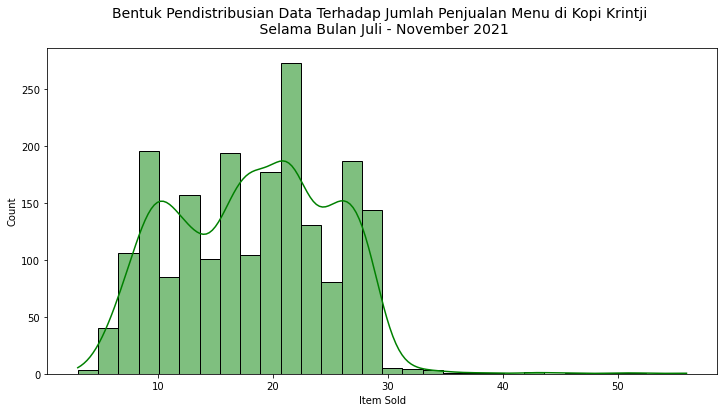

In [34]:
# Melihat distribusi data di dalam kolom "Item Sold" dengan memperhitungkan frekuensi data dalam beberapa range
plt.figure(figsize=(12, 6))

sns.histplot(x="Item Sold", color="green", kde=True, bins=30, data=data_stok)
plt.title("Bentuk Pendistribusian Data Terhadap Jumlah Penjualan Menu di Kopi Krintji \n Selama Bulan Juli - November 2021", 
          fontsize=14, pad=14)
plt.show()

Dalam pembuatan grafik histogram diatas saya menggunakan bantuan berupa garis kurva atau yang biasa dikenal sebagai KDE (Kernel Density Estimate) yang merupakan sebuah metode visualisasi untuk membantu dalam melihat bentuk pendistribusian sebuah data menggunakan garis kurva dengan menggunakan teknik kepadatan probabilitas dari suatu peubah acak yang bersifat kontinu. Kernel Density Estimate (KDE) yang ada di pada grafik histogram diatas saya gunakan untuk membantu dalam memperkirakan kepadatan data dan memperlancar pendistribusian data yang akan ditampilkan di dalam grafik. KDE relevan untuk digunakan pada analisis univariat yaitu sebuah bentuk analisis yang hanya menggunakan 1 variabel saja dengan tujuan agar dapat mengetahui karakteristik dari variabel tersebut.

Kemudian jika diperhatikan kembali, bentuk kurva pendistribusian data pada kolom "Item Sold" tidak simetris karena sifat simetris suatu pendistribusian data dapat dilihat apakah data tersebut memiliki skewnes atau tidak. Nilai skewness sendiri merupakan nilai yang bersifat condong (apakah condong ke arah negatif (kiri) atau positif (kanan) di dalam grafik).

Distribusi yang bagus adalah ketika distribusi tidak condong ke arah manapun (baik ke arah kanan/kiri) dan berada di pusat/tengah-tengah grafik (seperti bentuk lonceng atau yang biasa dikenal sebagai bell curve). Sedangkan kasus grafik diatas merupakan pendistribusian data yang dominan ke arah kiri yang itu berarti data ini tidak simetris dan sifat dari pendistribusian data di kolom Umur bersifat positif.

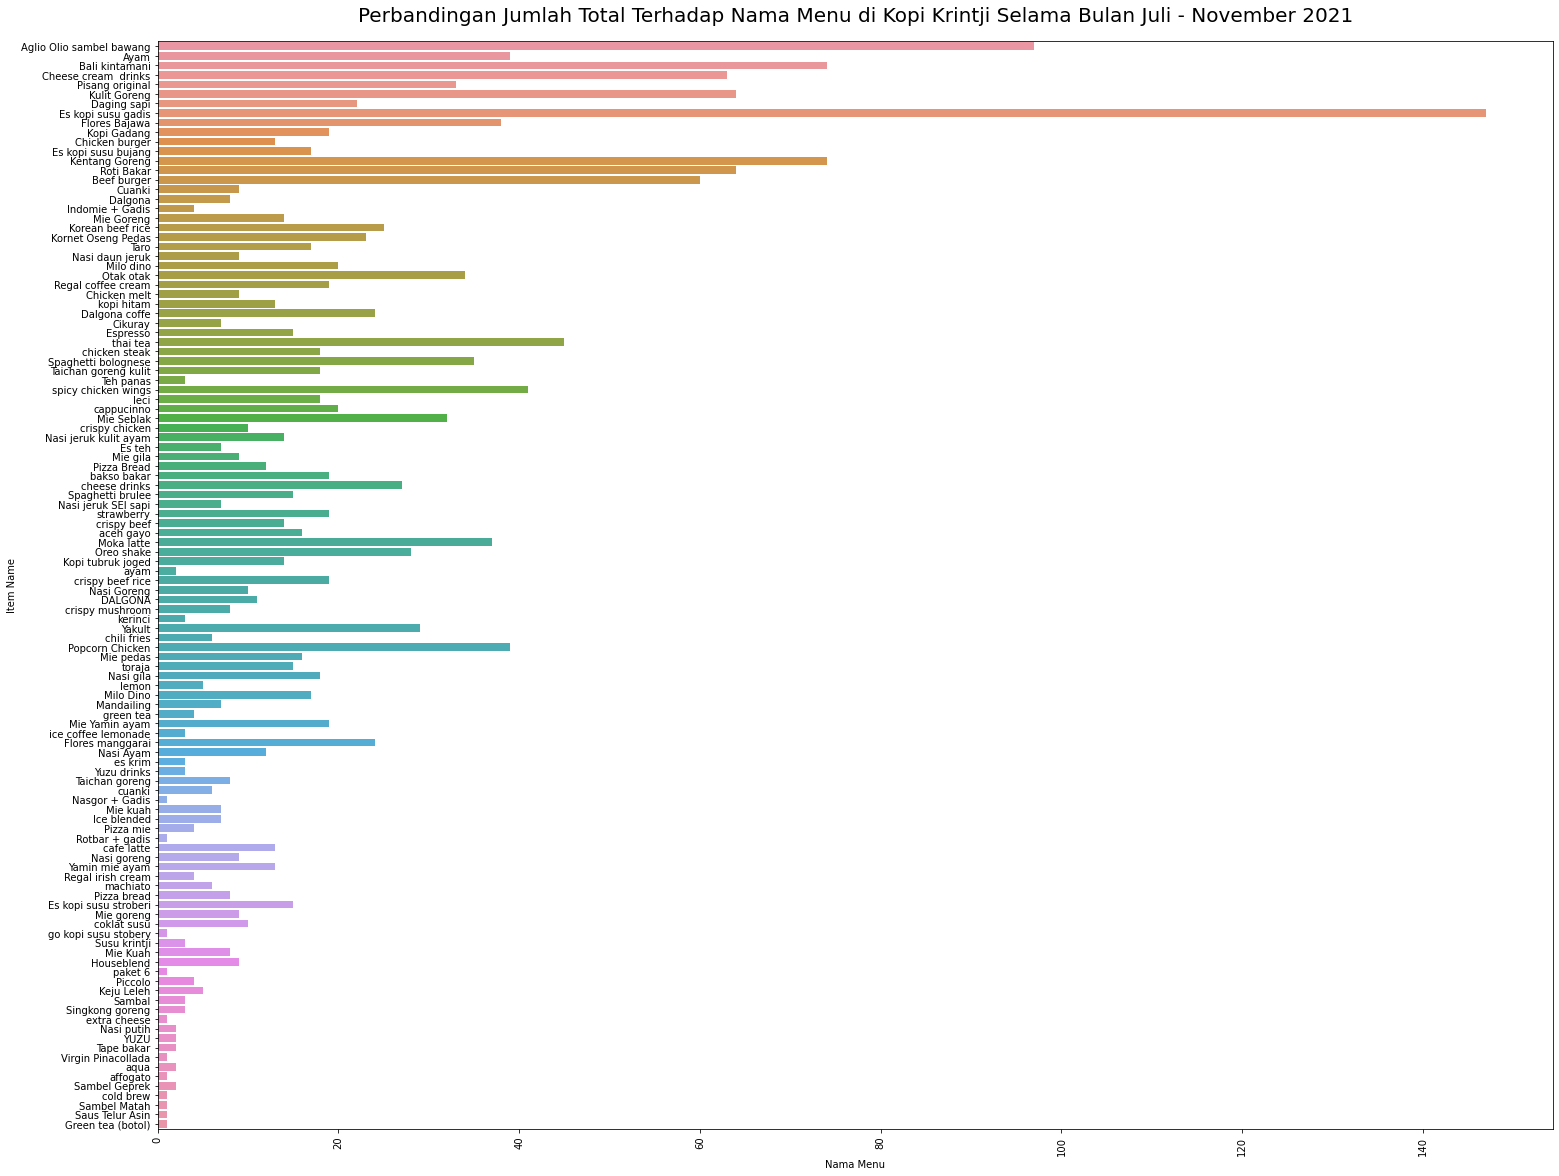

In [35]:
# Membandingkan jumlah total terkait nama menu yang dijual di Kopi Krintji selama periode bulan Juli - November 2021
plt.figure(figsize=(25, 20))
plt.xticks(rotation=90)

sns.countplot(y="Item Name", data=data_stok)
plt.title("Perbandingan Jumlah Total Terhadap Nama Menu di Kopi Krintji Selama Bulan Juli - November 2021", 
          fontsize=20, pad=20)
plt.xlabel("Nama Menu")
#plt.savefig("Grafik Perbandingan Nama Menu yang Dijual Selama Bulan Juli - November 2021.png")
plt.show()

Dari grafik batang diatas, saya dapat mengetahui data yang paling banyak dan sedikit di dalam kolom "Item Name". Kolom ini menunjukkan menu yang sering dipesan oleh customer Kopi Krintji dan juga menu yang jarang dipesan oleh customer Kopi Krintji. Harus diingat bahwasanya kategori menu yang ada di grafik diatas hanya sekedar perbandingan data yang ada di kolom "Item Name" saja yang berhasil terjual disetiap harinya selama periode bulan Juli - November 2021. Berikut adalah detail informasi yang saya dapatkan dari grafik diatas:

1. Menu yang selalu terjual atau dapat dikatakan menu paling laris adalah menu Es Kopi susu gadis yang berhasil dipesan oleh customer Kopi Krintji sebanyak 147 kali selama periode bulan Juli - November 2021.
2. Sedangkan menu yang jarang dipesan atau dapat dikatakan sebagai menu tidak laris karena hanya sedikit dipesan oleh customer Kopi Krintji adalah menu-menu seperti Nasgor + Gadis, Rotbar + gadis, go kopi susu stobery, paket 6, extra cheese, Virgin Pinacollada, affogato, cold brew, Sambel Matah, Saus Telur Asin, dan Green Tea (Botol) yang kesebelas menu tersebut hanya memiliki total penjualan sebanyak 1 kali saja selama periode bulan Juli - November 2021.

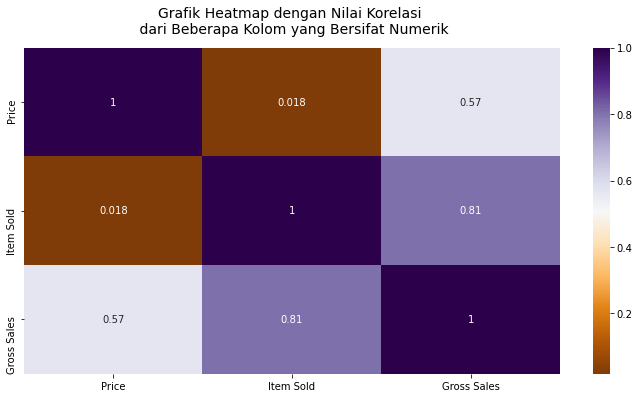

In [36]:
"""
Melihat nilai korelasi atau nilai hubungan timbal-balik dari masing-masing 
kolom numerik yang ada di dalam data_stok_olah menggunakan grafik peta panas (heatmap)
"""
plt.figure(figsize=(12, 6))

sns.heatmap(data_stok.corr(), cmap="PuOr", annot=True)
plt.title("Grafik Heatmap dengan Nilai Korelasi \n dari Beberapa Kolom yang Bersifat Numerik", fontsize=14, pad=14)
plt.show()

Grafik diatas dinamakan sebagai grafik heatmap atau grafik peta panas yang menunjukkan nilai korelasi/nilai keterhubungan yang bersifat hubungan timbal-balik antar masing-masing kolom. Data-data yang dapat diketahui nilai korelasinya adalah data yang bersifat numerik sedangkan data yang bersifat kategorik tidak dapat diketahui nilai korelasinya. 

Cara membaca grafik ini yaitu dengan mencocokkan nilai yang ada pada SUMBU Y dengan SUMBU X atau sebaliknya dengan memfokuskan perhatian kepada nilai yang ada di box sebagai penanda nilai hubungannya (nilai korelasi). Berikut adalah contoh penjelasan terkait cara membaca sekaligus menganalisis nilai korelasi antar kolom/variabel yang ada di SUMBU Y dan SUMBU X:

1. Variabel "Price" yang ada di SUMBU Y memiliki nilai korelasi dengan variabel "Gross Sales" yang ada di SUMBU X sebesar 0.57 yang dimana kedua variabel ini memiliki hubungan timbal-balik yang bagus.
2. Variabel "Item Sold" yang ada di SUMBU Y memiliki nilai korelasi dengan variabel "Price" yang ada di SUMBU X yakni hanya sebesar 0.018 yang dimana kedua variabel ini tidak terlalu memiliki hubungan timbal balik yang cukup bagus bahkan cenderung tidak memiliki korelasi.
3. Dan contoh terakhir adalah variabel "Gross Sales" yang ada di SUMBU Y yang memiliki nilai korelasi atau hubungan timbal-balik dengan variabel "Item Sold" yang ada di SUMBU X mencapai 0.81 yang dimana kedua variabel ini memiliki hubungan timbal balik yang sangat bagus yang dibuktikan dengan nilai korelasi antar masing-masing variabel.

Jadi intinya setiap variabel yang ada di SUMBU Y (yang berada di sisi kiri) dibaca/diperhatikan setiap nilainya dengan variabel yang berada di SUMBU X (yang berada di bawah). Selain itu untuk memudahkan dalam membedakan apakah nilai korelasinya bagus atau tidak dapat dilihat dari indikator warna yang di sebelah paling kanan dari grafik heatmap. Semakin bagus nilai korelasinya maka warnanya menjadi ungu gelap tetapi jika semakin buruk/kecil nilai korelasinya maka pewarnaan box persegi yang menunjukkan nilai korelasi akan menjadi berwarna cokelat.

## 4. Data Modelling

### 4.1. Pra-Pemodelan

Sebelum melakukan tahapan prediksi dengan algoritma regresi linear dan regresi decision tree (C4.5), saya akan melakukan proses pemisahan data menjadi 2 variabel yang berbeda yakni variabel independen (atau yang biasa dikenal sebagai variabel x) dan variabel dependen (dikenal sebagai variabel y/label prediksi). Untuk variabel independen pada pengujian kali ini yakni dari kolom "Item Sold" sedangkan untuk variabel dependennya adalah kolom "Gross Sales".

In [37]:
"""
Memisahkan data menjadi 2 variabel yang berbeda yakni variabel independen (variabel x) dan variabel dependen (variabel y) 
dengan kolom yang berbeda juga.
Untuk kolom yang ada di dalam variabel independen adalah kolom "Item Sold" 
sedangkan kolom di variabel dependen adalah "Gross Sales"
"""
x = data_stok[["Item Sold"]]

y = data_stok["Gross Sales"]

In [38]:
# Melihat isi data dari variabel independen dan juga variabel dependen
print("Susunan Data yang ada di dalam Variabel Independen: ")
print(x, "\n")

print("Susunan Data yang ada di dalam Variabel Dependen: ")
print(y)

Susunan Data yang ada di dalam Variabel Independen: 
      Item Sold
0            17
1             9
2            10
3             8
4            11
...         ...
1995         21
1996         19
1997         15
1998         22
1999         22

[2000 rows x 1 columns] 

Susunan Data yang ada di dalam Variabel Dependen: 
0       357000
1        27000
2       200000
3       160000
4       165000
         ...  
1995    315000
1996    380000
1997    270000
1998    440000
1999    396000
Name: Gross Sales, Length: 2000, dtype: int64


In [39]:
"""
Melihat ukuran (jumlah baris dan kolom) pada masing-masing variabel 
yakni variabel independen dan variabel dependen sebelum tahapan split validation
"""
print("Ukuran Variabel Independen Sebelum Proses Split Validation: ", x.shape)
print("Ukuran Variabel Dependen Sebelum Proses Split Validation: ", y.shape)

Ukuran Variabel Independen Sebelum Proses Split Validation:  (2000, 1)
Ukuran Variabel Dependen Sebelum Proses Split Validation:  (2000,)


Berdasarkan output diatas dapat diketahui bahwasanya jumlah baris yang didapatkan pada variabel independen dan variabel dependen adalah sama besar yakni sebanyak 2.000 data. Tidak hanya jumlah baris yang sama, jumlah kolom yang digunakan untuk setiap masing-masing variabel (antara variabel independen & variabel dependen) juga sama yakni sama-sama menggunakan 1 kolom saja. Yang menjadi perbedaannya adalah nama kolom yang digunakannya saja. Pada variabel independen, kolom yang digunakan adalah "Item Sold" atau jumlah menu yang berhasil terjual sedangkan pada variabel dependen kolom yang digunakan adalah kolom "Gross Sales" yang merupakan kolom pendapatan kotor.

Selain itu alasan kenapa saya menggunakan 1 kolom saja pada variabel independen adalah karena algoritma yang digunakan yakni regresi linear bukan regresi linear berganda karena algoritma regresi linear hanya menggunakan 1 kolom pada variabel independen sedangkan pada algoritma regresi linear berganda menggunakan 2 kolom atau lebih pada variabel independen.

In [40]:
"""
Melakukan pembagian data dengan komposisi/urutan data secara acak menjadi 2 bagian data yakni data training & data testing
dari dua variabel yang telah ada (variabel independen & variabel dependen). Proses pembagian kedua variabel tersebut akan
menggunakan teknik split validation atau yang biasa dikenal di dalam sklearn sebagai train_test_split
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=32)

Berikut adalah penjelasan dari proses split validation:

1. x: Merupakan sebuah variabel independen atau variabel yang dipengaruhi dari variabel dependen. Dalam pengujian ini, label yang mempengaruhi variabel y hanyalah kolom "Jual" saja karena algoritma yang digunakan merupakan regresi linear yang dimana algoritma ini hanya membutuhkan 1 variabel independen saja untuk memprediksi hubungan keterkaitan dalam sebuah korelasi.
2. y: Merupakan sebuah variabel dependen atau variabel yang mempengaruhi variabel independen. Variabel y juga biasa dikenal sebagai label prediksi. Dalam pengujian ini, label prediksinya adalah kolom "Total". Kolom "Total" ini merupakan data yang didapatkan dari hasil penjualan untuk setiap masing-masing sayur-mayur yang telah terjual per hari.
3. test_size: Nilai presentase atau nilai proporsi dalam pembagian data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai presentase test_size sebesar 0.35 yang dimana ukuran dari data test mencapai 35% dan data train mencapai 65%.
4. random_state: Fungsi ini berfungsi untuk menetapkan nilai supaya ketika setiap kali codingan dijalankan maka nilai yang ada di data training dan data testing akan selalu tetap dan nilainya dan tidak berubah-ubah sedangkan jika di proses split validation ini tidak menetapkan nilai random_state maka setiap codingan dijalankan maka nilai baru akan teracak kembali di data training dan data testing sehingga akan memiliki nilai yang berbeda-beda setiap saat codingan dijalankan. Dalam menetapkan nilai random_state tidak ada ketentuan nilai yang pasti (bebas menentukan nilai bilangan bulat) namun dalam pengujian kali ini saya menetapkan nilai 32 di random_state.

Selain keempat penjelasan tersebut terdapat juga variabel-variabel baru seperti x_train, x_test, y_train, dan y_test. Berikut adalah penjelasannya:

1. x_train: Merupakan data training/data yang akan melatih menggunakan model machine learning. Variabel x_train terdiri dari variabel independen (variabel x) yang akan dilatih selama pemodelan berlangsung.
2. x_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Variabel x_test terdiri dari variabel independen (variabel x) yang akan diuji dengan data training.
3. y_train: Merupakan data training atau data yang akan melatih menggunakan model machine learning. Perbedaan dengan x_train yaitu variabel y_train terdiri dari variabel dependen (variabel y) yang akan dilatih selama proses pemodelan berlangsung.
4. y_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Sama seperti pada variabel y_train, variabel y_test sudah pasti berbeda dengan variabel x_test karena variabel ini, variabel y_test, terdiri dari variabel dependen (variabel y) yang akan diuji selama proses pemodelan berlangsung.

In [41]:
# Melihat susunan data yang ada di dalam data training setelah tahapan split validation
print("Susunan Data Training terhadap Variabel Independen setelah Proses Split Validation: ")
print(x_train, "\n")

print("Susunan Data Training terhadap Variabel Dependen setelah Proses Split Validation: ")
print(y_train, "\n")

Susunan Data Training terhadap Variabel Independen setelah Proses Split Validation: 
      Item Sold
329           9
1100         11
1849         24
659           9
1796         21
...         ...
892          24
1334         11
1925         16
1579         26
727          11

[1300 rows x 1 columns] 

Susunan Data Training terhadap Variabel Dependen setelah Proses Split Validation: 
329     207000
1100    275000
1849    240000
659     180000
1796    315000
         ...  
892     480000
1334    220000
1925    304000
1579    520000
727     165000
Name: Gross Sales, Length: 1300, dtype: int64 



In [42]:
# Melihat susunan data yang ada di dalam data testing setelah tahapan split validation
print("Susunan Data Testing terhadap Variabel Independen setelah Proses Split Validation: ")
print(x_test, "\n")

print("Susunan Data Testing terhadap Variabel Dependen setelah Proses Split Validation: ")
print(y_test)

Susunan Data Testing terhadap Variabel Independen setelah Proses Split Validation: 
      Item Sold
1496          9
270          16
611           8
938          10
572           9
...         ...
36           37
1292         18
1243         20
1225         28
607          15

[700 rows x 1 columns] 

Susunan Data Testing terhadap Variabel Dependen setelah Proses Split Validation: 
1496    162000
270     288000
611     144000
938     180000
572     207000
         ...  
36      740000
1292    378000
1243    300000
1225    504000
607     375000
Name: Gross Sales, Length: 700, dtype: int64


In [43]:
"""
Melihat ukuran (jumlah baris dan kolom) pada masing-masing data (data training & data testing)
dari 2 variabel yakni variabel independen dan variabel dependen setelah tahapan split validation
"""
print("Ukuran Data Training setelah Proses Split Validation: ", x_train.shape, y_train.shape)
print("Ukuran Data Testing setelah Proses Split Validation: ", x_test.shape, y_test.shape)

Ukuran Data Training setelah Proses Split Validation:  (1300, 1) (1300,)
Ukuran Data Testing setelah Proses Split Validation:  (700, 1) (700,)


In [44]:
# Melakukan scaling data terhadap data training dan data testing dengan RobustScaler
from sklearn.preprocessing import RobustScaler

robustscaler = RobustScaler()

x_train = robustscaler.fit_transform(x_train)
x_test = robustscaler.fit_transform(x_test)

RobustScaler merupakan salah tiga (standard scaler,  min max scaler, dan robust scaler) dari teknik scaling data yang sering digunakan di dalam pengujian machine learning yang dimana teknik scaling dengan RobustScaler dapat melakukan penskalaan fitur variabel terhadap nilai outliers yang ada di dalam data. Karena fitur atau kolom-kolom yang saya gunakan (Jual & Total) sepertinya memiliki nilai outlier maka dari itu penggunaan robust scaler akan dirasa cukup tepat dari pada menggunakan teknik standrad scaler ataupun min max scaler.

RobustScaler akan terlebih dahulu mengurang/menghilangkan nilai median (quartil 2 dengan presentase sebesar 50%) dan kemudian akan di skalakan nilai data tersebut ke dalam range nilai quartil  3 dan quartil 1. Range nilai dari quartil 3 ke quartil 1 dikenal sebagai nilai nilai interquartile range (IQR). Nilai IQR sendiri merupakan nilai yang didapatkan dari rentang nilai terhadap nilai quartil 1 (25%) dan juga quartil 3 (75%). Rumus dari robust scaler adalah sebagai berikut:

value_predicted = x - Q1 (x) / Q3 (x) - Q1 (x)


Untuk lebih lanjut dapat membaca link referensi terkait RobustScaler dibawah ini:

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=let's%20start%20scaling!-,MinMaxScaler,shape%20of%20the%20original%20distribution.

- https://machinelearninggeek.com/feature-scaling-minmax-standard-and-robust-scaler/


In [45]:
# Melihat hasil dari proses penskalaan RobustScaler untuk masing-masing data (data training & data testing)
print("Nilai Scaling dari Hasil RobustScaler pada Data Training: \n", x_train)

print("\n", "----------------------------------------------------------------------------", "\n")

print("Nilai Scaling dari Hasil RobustScaler pada Data Testing: \n", x_test)

Nilai Scaling dari Hasil RobustScaler pada Data Training: 
 [[-0.83333333]
 [-0.66666667]
 [ 0.41666667]
 ...
 [-0.25      ]
 [ 0.58333333]
 [-0.66666667]]

 ---------------------------------------------------------------------------- 

Nilai Scaling dari Hasil RobustScaler pada Data Testing: 
 [[-1. ]
 [-0.3]
 [-1.1]
 [-0.9]
 [-1. ]
 [ 0.9]
 [-1.1]
 [-0.3]
 [ 0.6]
 [ 0.8]
 [-0.2]
 [-0.5]
 [ 0. ]
 [-0.8]
 [ 0.6]
 [ 0.2]
 [ 0. ]
 [-1. ]
 [-0.8]
 [ 0.3]
 [-0.3]
 [ 0.6]
 [-0.3]
 [ 0.8]
 [ 0. ]
 [-1. ]
 [ 0.2]
 [-0.1]
 [-1. ]
 [-0.7]
 [ 0.2]
 [-1.1]
 [ 0.3]
 [-0.9]
 [-0.7]
 [-1. ]
 [-0.2]
 [-0.9]
 [-0.2]
 [-0.9]
 [-0.6]
 [ 0.5]
 [ 1. ]
 [ 0.3]
 [ 0.9]
 [-0.1]
 [ 0.2]
 [ 1. ]
 [ 0. ]
 [-0.1]
 [-1.3]
 [ 0.5]
 [-1. ]
 [-0.2]
 [ 0.6]
 [-0.8]
 [ 0.3]
 [-1. ]
 [-1.1]
 [-1.1]
 [ 0.5]
 [ 0.2]
 [ 0.3]
 [-1.4]
 [-0.2]
 [ 0.2]
 [ 0. ]
 [ 0.9]
 [ 0.3]
 [-0.9]
 [ 0. ]
 [-1.1]
 [ 0.3]
 [-0.1]
 [ 1. ]
 [-0.3]
 [ 0.9]
 [-0.1]
 [-0.6]
 [ 1. ]
 [-0.2]
 [-0.1]
 [ 0.7]
 [ 0.7]
 [-0.3]
 [ 0.9]
 [ 0.5]
 [ 0. ]


### 4.2. Algoritma Regresi Linear

In [46]:
"""
Memanggil algoritma regresi linear dari library sklearn dan kemudian melatihnya dengan data training.
Selain kedua proses tersebut di tahapan ini juga akan mencari nilai terbaik 
dari list parameters yang saya gunakan. Parameter-parameter tersebut juga berasal dari algoritma regresi linear. 
Untuk membantu dalam mencari the best value per parameter dari algoritma regresi linear, 
saya akan menggunakan sebuah teknik validasi parameter yang bernama GridSearchCV
"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


linear_reg_model = LinearRegression()

parameters_linear_reg = {
    "fit_intercept": [True, False],
    "n_jobs": [3, 6, 5, 9, 12]
}

grid_search_linear_regression = GridSearchCV(linear_reg_model, parameters_linear_reg)
grid_search_linear_regression.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter diatas berdasarkan algoritma regresi linear 
print("Nilai Terbaik dari Parameter fit_intercept adalah: ", 
      grid_search_linear_regression.best_estimator_.get_params()["fit_intercept"])
print("Nilai Terbaik dari Parameter n_jobs adalah: ", grid_search_linear_regression.best_estimator_.get_params()["n_jobs"])

Nilai Terbaik dari Parameter fit_intercept adalah:  True
Nilai Terbaik dari Parameter n_jobs adalah:  3


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di algoritma regresi linear maka didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter fit_intercept, nilai terbaik dari parameter ini adalah True.
2. Parameter terakhir yang saya gunakan dalam algoritma regresi linear adalah parameter n_jobs yang memiliki best value (nilai terbaik) yakni 3.

Nilai-nilai tersebut didapatkan dari proses pencarian nilai terbaik di dalam algoritma regresi linear khususnya ketika sedang melatih data dengan data training. Selain itu juga terdapat sebuah fungsi untuk mengoptimalkan proses pencarian nilai terbaik untuk setiap masing-masing parameter di algoritma regresi linear yaitu GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari sebuah nilai terbaik (the best value) dari parameter-parameter algoritma machine learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=What%20is%20GridSearchCV%3F,parameters%20from%20the%20listed%20hyperparameters.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [47]:
"""
Melihat nilai prediksi dari data testing dan data training setelah dilakukan 
proses tunning parameters di algoritma regresi linear dan melatihnya dengan data training
"""
print("----------------Nilai Prediksi untuk Data Testing------------------")
linear_test = grid_search_linear_regression.predict(x_test)
print(linear_test)

print("\n----------------Nilai Prediksi untuk Data Training-----------------")
linear_train = grid_search_linear_regression.predict(x_train)
print(linear_train)

----------------Nilai Prediksi untuk Data Testing------------------
[ 129204.93421929  287989.89463155  106521.36844611  151888.49999247
  129204.93421929  560192.68390971  106521.36844611  287989.89463155
  492141.98659017  537509.11813653  310673.46040473  242622.76308519
  356040.59195109  174572.06576565  492141.98659017  401407.72349745
  356040.59195109  129204.93421929  174572.06576565  424091.28927063
  287989.89463155  492141.98659017  287989.89463155  537509.11813653
  356040.59195109  129204.93421929  401407.72349745  333357.02617791
  129204.93421929  197255.63153883  401407.72349745  106521.36844611
  424091.28927063  151888.49999247  197255.63153883  129204.93421929
  310673.46040473  151888.49999247  310673.46040473  151888.49999247
  219939.19731201  469458.42081699  582876.24968289  424091.28927063
  560192.68390971  333357.02617791  401407.72349745  582876.24968289
  356040.59195109  333357.02617791   61154.23689975  469458.42081699
  129204.93421929  310673.46040473 

Setelah melakukan proses pemanggilan salah satu algoritma machine learning yang akan digunakan yaitu regresi linear sekaligus melatihnya dengan data training dan juga telah mendapatkan the best value/nilai terbaik dari masing-masing parameter, selanjutnya saya akan melihat hasil akhir yang berupa nilai prediksi yang didapatkan dari ketiga metrics yang saya gunakan yaitu mean absolute error, mean squared error, dan r2 score. Berikut adalah pembahasan dari ketiga metrics tersebut:

1. Mean Absoulute Error (MAE) merupakan nilai kesalahan rata-rata (nilai error) absolute yang didapatkan dari hasil prediksi/peramalan dengan berlandaskan nilai yang sebenarnya. Metric ini sangat sering digunakan ketika dalam pengujian data yang bersifat peramalan (forecasting) dikarenakan bertujuan untuk mengukur prediksi eror di dalam pengujian yang bersifat forecasting/prediksi.
2. Mean Squared Error (MSE) merupakan perwakilan dari nilai error rata-rata dari hasil prediksi. Hasil tersebut didapatkan dari hasil perbedaan kuadrat antara nilai asli dengan nilai hasil prediksi. Hasil prediksi menggunakan metric MSE tidak akan pernah negatif sebab dalam praktiknya akan mengkuadratkan kesalahan prediksi. Semakin rendah nilai MSE yang dihasilkan maka prediksinya semakin bagus dan tepat.
3. R-Squared (R2 Score) merupakan nilai metric yang bersifat presentase dengan menunjukkan sifat kecocokan dari hasil seberapa banyak nilai variasi dari variabel dependen (variabel y) yang dapat dijelaskan oleh variabel independen (variabel x) dalam pengujian regresi. Range nilai yang ada di dalam metric R2 Score berada di angka 0% - 100%. Intinya metric ini akan mengindikasikan seberapa besar kombinasi variabel independen dengan mempengaruhi nilai pada variabel dependen. Semakin nilai presentasenya mendekati angka 1 maka semakin baik dan cocok antara algoritma yang digunakan dengan data yang digunakan. R-squared juga dapat dikatakan sebagai metric akurasi dalam pengujian regresi.


Referensi terkait ketiga metric diatas (MAE, MSE, dan R-Squared):

- https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e#:~:text=Both%20RMSE%20and%20R%2D%20Squared,variation%20in%20the%20response%20variable.

- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

In [48]:
"""
Melihat hasil prediksi regresi linear dari data testing dan juga data training 
menggunakan ketiga metrics yakni MAE, MSE, dan R2 Score
"""
print("-------------------------Nilai Prediksi terhadap Data Testing di Algoritma Regresi Linear-------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, linear_test))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test, linear_test))
print("Nilai Metric R2 Score di Data Test Adalah: ", "%.2f" % r2_score(y_test, linear_test), "\n")


print("-------------------------Nilai Prediksi terhadap Data Training di Algoritma Regresi Linear-------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, linear_train))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, linear_train))
print("Nilai Metric R2 Score di Data Train Adalah: ", "%.2f" % r2_score(y_train, linear_train))

-------------------------Nilai Prediksi terhadap Data Testing di Algoritma Regresi Linear-------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  64771.56
Nilai Metric Mean Squared Error di Data Test adalah:  9394488337.61
Nilai Metric R2 Score di Data Test Adalah:  0.65 

-------------------------Nilai Prediksi terhadap Data Training di Algoritma Regresi Linear-------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  59697.34
Nilai Metric Mean Squared Error di Data Train adalah:  9224945948.40
Nilai Metric R2 Score di Data Train Adalah:  0.64


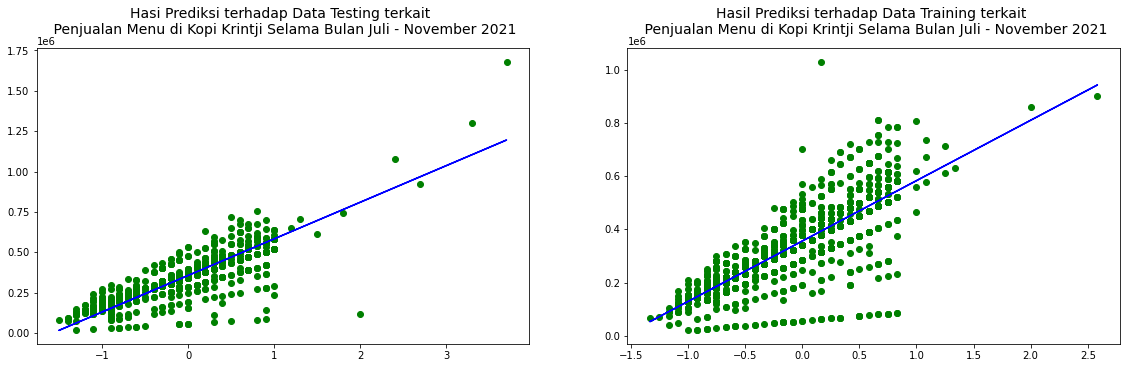

In [49]:
"""
Melihat korelasi/hubungan keterkaitan terhadap data testing dan data training 
setelah dilakukan proses prediksi menggunakan algoritma regresi linear
"""
plt.figure(figsize=(30, 25))

plt.subplot(4, 3, 1)
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, linear_test, color="blue")
plt.title("Hasi Prediksi terhadap Data Testing terkait \n Penjualan Menu di Kopi Krintji Selama Bulan Juli - November 2021", 
          fontsize=14, pad=14)

plt.subplot(4, 3, 2)
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, linear_train, color="blue")
plt.title("Hasil Prediksi terhadap Data Training terkait \n Penjualan Menu di Kopi Krintji Selama Bulan Juli - November 2021", 
          fontsize=14, pad=14)
plt.show()

Berdasarkan dari kedua grafik diatas, baik hasil dari data testing & data training, keduanya memiliki hubungan yang linear serta juga memiliki hubungan yang positif karena data-data yang ada di dalam sumbu X mengalami peningkatan yang disertai dengan nilai data point yang berada di sumbu y.

Walaupun kedua grafik diatas bersifat linear (karena garis tersebut mengalami peningkatan nilai) tetapi terdapat perbedaan yang cukup jelas seperti dalam grafik pada data testing yang garisnya mengalami peningkatan yang tidak terlalu lurus keatas sedangkan pada grafik di data training, garisnya mengalami peningkatan secara lurus keatas walaupun lurusnya tidak sempurna.

Selain perbedaan pada garis juga terdapat perbedaan dalam persebaran titik data (data point) yang dimana pada hasil prediksi di data testing, persebaran datanya cukup mengumpul walaupun ada juga beberapa titik data yang menyebar sedangkan persebaran data di data training mayoritas titik datanya bersifat lebih menyebar walaupun ada juga beberapa titik-titik data yang berkumpul.

### 4.3. Algoritma Regresi Decision Tree (C4.5)

In [50]:
"""
Memanggil algoritma decision tree, tepatnya algoritma regresi decision tree dari library sklearn 
dan kemudian melatihnya dengan data training. Selain kedua proses tersebut, pada tahapan ini juga akan mencari nilai terbaik 
dari beberapa parameters yang saya gunakan. Parameter-parameter tersebut berasal algoritma regresi decision tree.
Untuk membantu dalam mencari the best value per parameter, 
saya akan menggunakan sebuah teknik validasi parameter yakni GridSearchCV
"""
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree # Library ini berfungsi untuk membuat grafik pohon keputusan di data training & data testing

decisiontree_reg_model = DecisionTreeRegressor()

parameters_dt_reg = {
    "random_state": [5, 7, 4, 11, 9],
    "max_depth": [4, 11, 6, 5, 8]
}

grid_search_decisiontree_reg = GridSearchCV(decisiontree_reg_model, parameters_dt_reg)
grid_search_decisiontree_reg.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter diatas berdasarkan algoritma regresi decision tree 
print("Nilai Terbaik dari Parameter random_state adalah: ",
      grid_search_decisiontree_reg.best_estimator_.get_params()["random_state"])
print("Nilai Terbaik dari Parameter max_depth adalah: ",
      grid_search_decisiontree_reg.best_estimator_.get_params()["max_depth"])

Nilai Terbaik dari Parameter random_state adalah:  5
Nilai Terbaik dari Parameter max_depth adalah:  4


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di algoritma regresi decision tree maka didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter ramdom_state, nilai terbaik yang didapatkan adalah 5.
2. Sedangkan parameter terakhir yang digunakan yakni parameter max_depth memiliki nilai terbaik yakni 4. 

Sama seperti saat saya melakukan proses pencarian nilai terbaik dari masing-masing parameter pada algoritma regresi linear, di dalam pengujian menggunakan algoritma regresi decision tree yaitu saya melakukan proses pencarian nilai terbaik dari parameter yang saya buat di dalam algoritma regresi decision tree dengan menggunakan data training. Sama seperti saat saya mencari the best value (nilai terbaik) dari masing-masing parameter di dalam algoritma regresi linear, pada algoritma regresi decision tree juga terdapat sebuah fungsi untuk mengoptimalkan proses pencarian nilai terbaik dalaam setiap masing-masing parameter di algoritma regresi decision tree yaitu GridSearchCV.

GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari sebuah nilai terbaik (the best value) dari parameter-parameter algoritma machine learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=What%20is%20GridSearchCV%3F,parameters%20from%20the%20listed%20hyperparameters.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [51]:
"""
Melihat nilai prediksi dari data testing dan data training setelah dilakukan 
proses tunning parameters di algoritma regresi decision tree dan melatihnya dengan data training
"""
print("----------------Nilai Prediksi untuk Data Testing------------------")
decisiontree_reg_test = grid_search_decisiontree_reg.predict(x_test)
print(decisiontree_reg_test)

print("\n----------------Nilai Prediksi untuk Data Training-----------------")
decisiontree_reg_train = grid_search_decisiontree_reg.predict(x_train)
print(decisiontree_reg_train)

----------------Nilai Prediksi untuk Data Testing------------------
[152552.         296617.64705882 103000.         152552.
 152552.         519784.31372549 103000.         296617.64705882
 494800.         519784.31372549 314243.69747899 241800.
 377572.72727273 152552.         494800.         390233.00970874
 377572.72727273 152552.         152552.         422136.36363636
 296617.64705882 494800.         296617.64705882 519784.31372549
 377572.72727273 152552.         390233.00970874 314243.69747899
 152552.         206515.78947368 390233.00970874 103000.
 422136.36363636 152552.         206515.78947368 152552.
 314243.69747899 152552.         314243.69747899 152552.
 206515.78947368 454317.75700935 638900.         422136.36363636
 519784.31372549 314243.69747899 390233.00970874 638900.
 377572.72727273 314243.69747899 103000.         454317.75700935
 152552.         314243.69747899 494800.         152552.
 422136.36363636 152552.         103000.         103000.
 454317.75700935 3902

Sama seperti ketika di dalam tahapan memprediksi dengan algoritma regresi linear, pada algoritma regresi decision tree juga melakukan proses memprediksi menggunakan nilai parameter yang telah didapatkan pada proses GridSearchCV. Nilai-nilai prediksi untuk data testing dan data training dapat dilihat dari output diatas.

Pada tahap selanjutnya adalah saya akan melihat hasil akhir yang berupa nilai prediksi yang didapatkan dari ketiga metrics yang saya gunakan yaitu mean absolute error (MAE), mean squared error (MSE), dan r2 score. Berikut adalah pembahasan dari ketiga metrics tersebut:

1. Mean Absoulute Error (MAE) merupakan nilai kesalahan rata-rata (nilai error) absolute yang didapatkan dari hasil prediksi/peramalan dengan berlandaskan nilai yang sebenarnya. Metric ini sangat sering digunakan ketika dalam pengujian data yang bersifat peramalan (forecasting) dikarenakan bertujuan untuk mengukur prediksi eror di dalam pengujian yang bersifat forecasting/prediksi.
2. Mean Squared Error (MSE) merupakan perwakilan dari nilai error rata-rata dari hasil prediksi. Hasil tersebut didapatkan dari hasil perbedaan kuadrat antara nilai asli dengan nilai hasil prediksi. Hasil prediksi menggunakan metric MSE tidak akan pernah negatif sebab dalam praktiknya akan mengkuadratkan kesalahan prediksi. Semakin rendah nilai MSE yang dihasilkan maka prediksinya semakin bagus dan tepat.
3. R-Squared (R2 Score) merupakan nilai metric yang bersifat presentase dengan menunjukkan sifat kecocokan dari hasil seberapa banyak nilai variasi dari variabel dependen (variabel y) yang dapat dijelaskan oleh variabel independen (variabel x) dalam pengujian regresi. Range nilai yang ada di dalam metric R2 Score berada di angka 0% - 100%. Intinya metric ini akan mengindikasikan seberapa besar kombinasi variabel independen dengan mempengaruhi nilai pada variabel dependen. Semakin nilai presentasenya mendekati angka 1 maka semakin baik dan cocok antara algoritma yang digunakan dengan data yang digunakan. R-squared juga dapat dikatakan sebagai metric akurasi dalam pengujian regresi.

Referensi terkait ketiga metric diatas (MAE, MSE, dan R-Squared):

- https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e#:~:text=Both%20RMSE%20and%20R%2D%20Squared,variation%20in%20the%20response%20variable.

- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

In [52]:
"""
Melihat hasil prediksi dari data testing dan juga data training 
berdasarkan algoritma regresi decision tree dengan menggunakan 
ketiga metrics yang sama dengan algoritma regresi linear yakni metrics mean absolute error (MAE), 
mean squared error (MSE), dan R-Squared (R2 Score)
"""
print("----------------------------Nilai Prediksi terhadap Data Training di Regresi Decision Tree----------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, decisiontree_reg_test))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test, decisiontree_reg_test))
print("Nilai Metric R2 Score di Data Test Adalah: ", "%.2f" % r2_score(y_test, decisiontree_reg_test), "\n")


print("----------------------------Nilai Prediksi terhadap Data Training di Regresi Decision Tree---------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, decisiontree_reg_train))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, decisiontree_reg_train))
print("Nilai Metric R2 Score di Data Train Adalah: ", "%.2f" % r2_score(y_train, decisiontree_reg_train))

----------------------------Nilai Prediksi terhadap Data Training di Regresi Decision Tree----------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  66289.38
Nilai Metric Mean Squared Error di Data Test adalah:  10369279663.55
Nilai Metric R2 Score di Data Test Adalah:  0.62 

----------------------------Nilai Prediksi terhadap Data Training di Regresi Decision Tree---------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  59936.13
Nilai Metric Mean Squared Error di Data Train adalah:  9128114236.26
Nilai Metric R2 Score di Data Train Adalah:  0.64


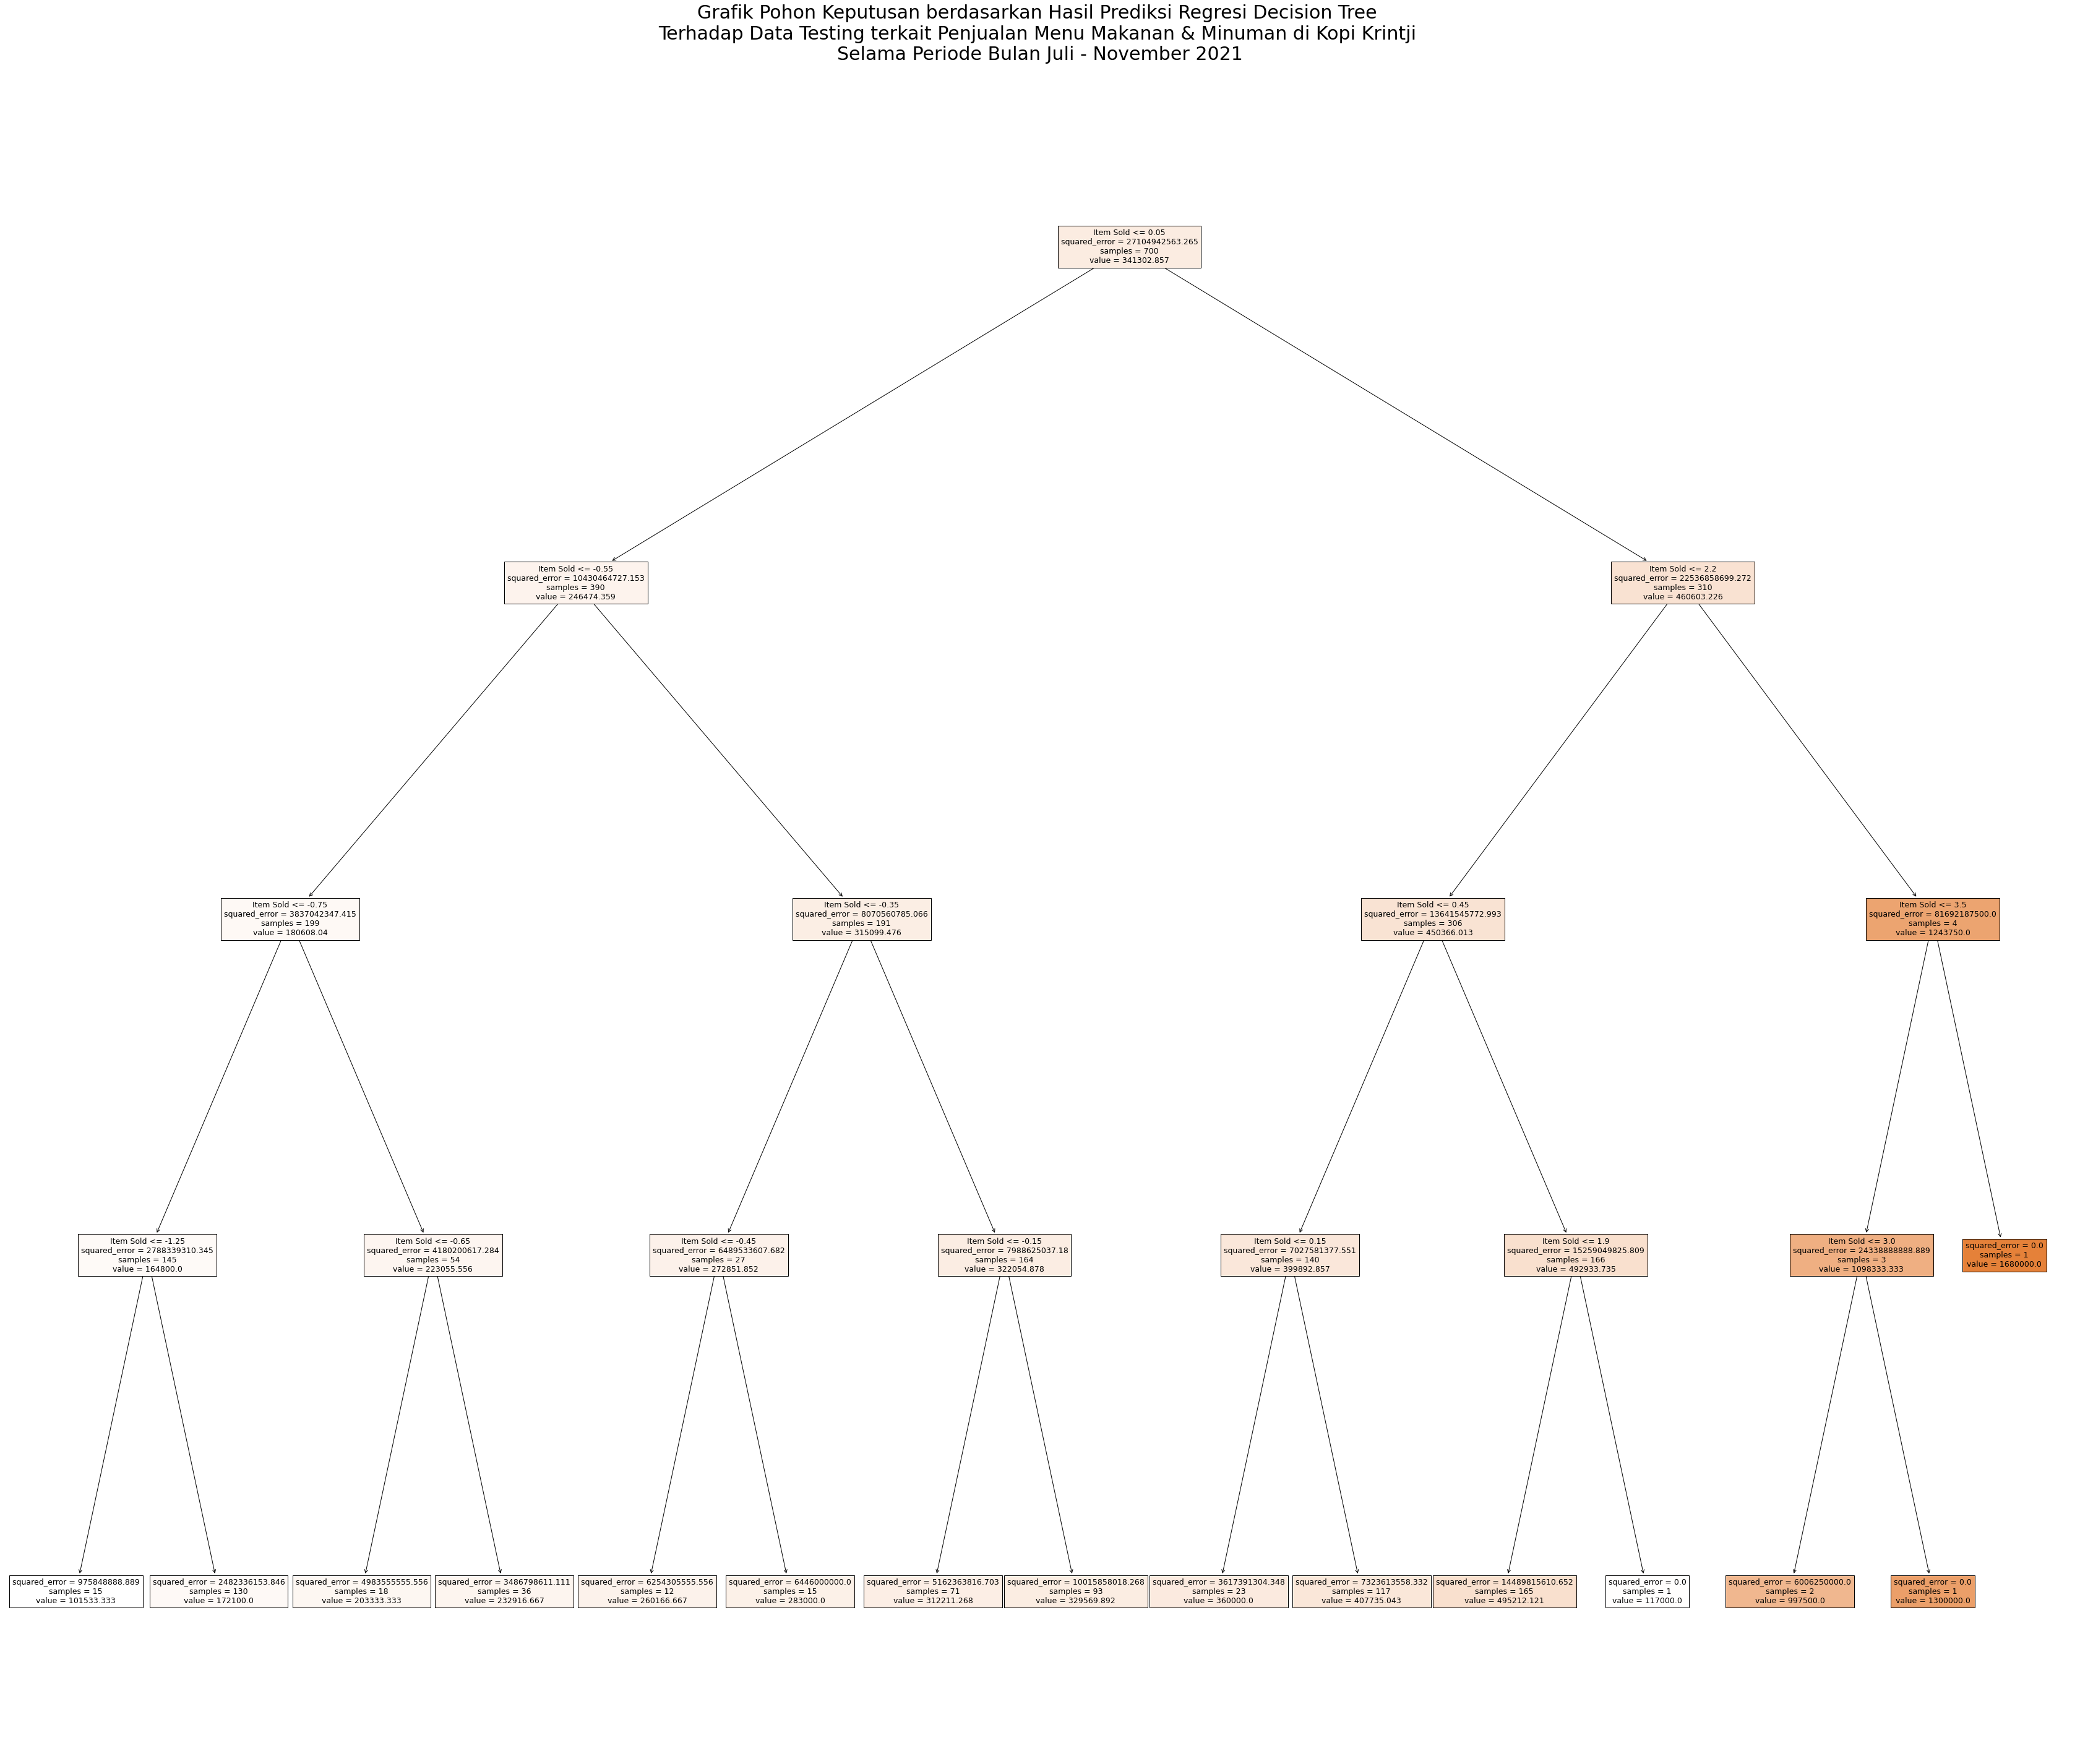

In [53]:
# Membuat visualisasi pohon keputusan dari algoritma regresi decision tree terhadap data testing

# Membuat model decision tree yang akan melakukan proses fitting terhadap data testing
test_tree = DecisionTreeRegressor(random_state=5, max_depth=4)
test_tree.fit(x_test, y_test)

# Fungsi untuk membuat grafik pohon keputusan terhadap data testing di algoritma regresi decision tree
def get_test_tree(data_test):
    plt.figure(figsize=(60, 50))
    tree.plot_tree(data_test, feature_names=x.columns, class_names=True, filled=True)
    plt.title("Grafik Pohon Keputusan berdasarkan Hasil Prediksi Regresi Decision Tree \n"
              "Terhadap Data Testing terkait Penjualan Menu Makanan & Minuman di Kopi Krintji \n"
              "Selama Periode Bulan Juli - November 2021", 
              fontsize=30, pad=30)
    
graph_dt = get_test_tree(test_tree)
#plt.savefig("Grafik Pohon Keputusan Data Testing terkait Memprediksi Penjualan Harga Makanan & Minuman di Kopi Krintji.png")

Hasil grafik visualisasi diatas merupakan sebuah grafik pohon keputusan yang khusus hanya dimiliki oleh algoritma decision tree baik untuk kebutuhan klasifikasi ataupun prediksi (regresi). Di dalam grafik tersebut terdapat beberapa istilah terminologi dalam pohon keputusan untuk data testing dan berikut diantaranya:

1. Root node: merupakan seluruh atau bisa dikatakan sebagai awalan sampel/populasi yang selanjutnya dibagi menjadi terbagi menjadi dua atau lebih set variabel yang lebih homogen. Root node juga dapat dikatakan sebagai node tertinggi (yang paling teratas) di dalam grafik struktur pohon keputusan. Root node di dalam grafik pohon keputusan untuk data testing diatas yakni memiliki nilai Item Sold <= 0.05 dengan nilai squared_error mencapai 27104942563.265 dari samples ke 700 dengan nilai value = 341302.857.
2. Splitting: istilah ini merupakan sebuah pemrosesan dalam membagi sebuah node (baik dari root node/decision node) menjadi dua atau lebih sub-node pada grafik pohon keputusan. Splitting juga dapat dikatakan sebagai garis pembagi dalam grafik pohon keputusan.
3. Decision node: merupakan istilah dalam grafik pohon keputusan untuk memecah sub-node menjadi sub-node yang lebih lanjut. Decision node ini berisi node pilihan yang outputnya bisa berupa decision node kembali atau leaf node. Salah satu contoh nilai dari decision node adalah nilai Item Sold <= -1.25 dengan nilai metrics squared_error yakni 2788339310.345 dari samples data ke 145 dengan value = 164800.0.
4. Terminal node (leaf node): merupakan node atau bagian di dalam grafik pohon keputusan yang tidak memiliki cabang atau bisa dikatakan sebagai hasil akhir dari pohon layaknya daun. Sebagai contoh pada leaf node dari grafik pohon keputusan data testing adalah ketika nilai squared_error mencapai 975848888.889 berdasarkan samples ke 15 dengan nilai value = 101533.333.
4. Dll.

Berikut adalah referensi untuk membaca dan memahami grafik pohon keputusan:

- https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

- https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

- http://diyanaprilia.blog.widyatama.ac.id/2019/10/08/4-decision-tree/

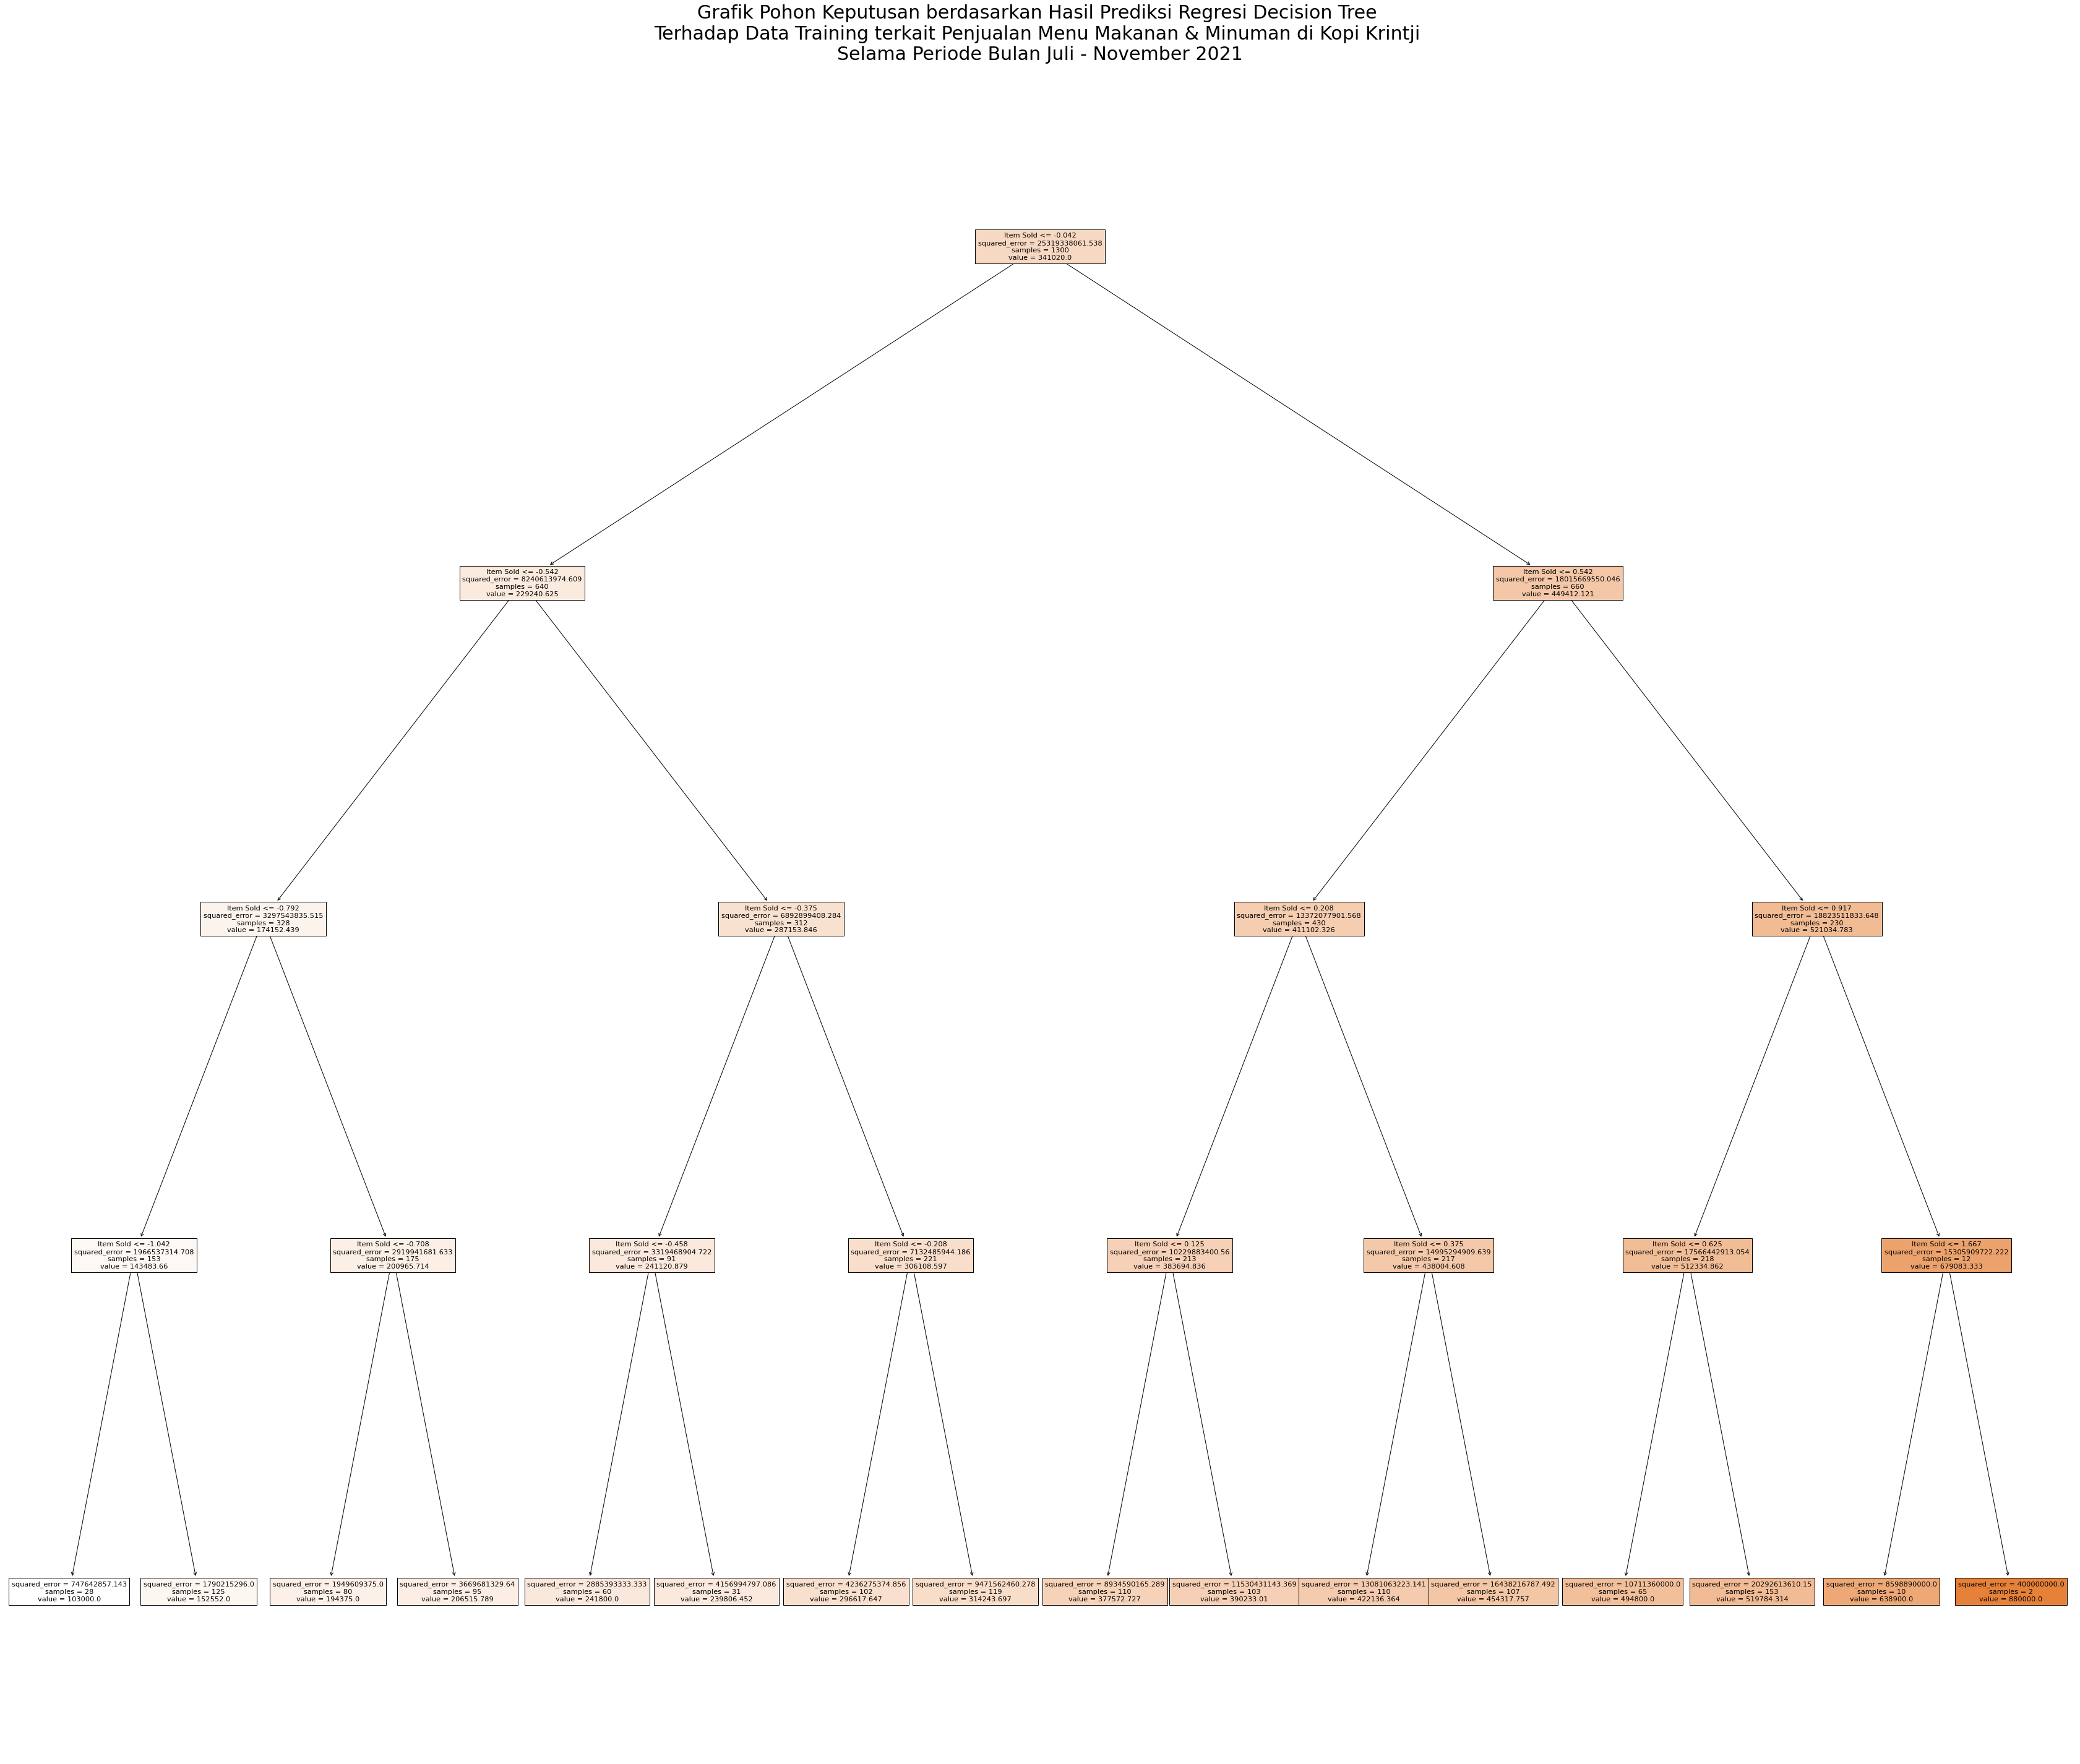

In [54]:
# Membuat visualisasi pohon keputusan dari algoritma regresi decision tree terhadap data training

# Membuat model decision tree yang akan melakukan proses fitting terhadap data training
train_tree = DecisionTreeRegressor(random_state=5, max_depth=4)
train_tree.fit(x_train, y_train)

# Fungsi untuk membuat grafik pohon keputusan terhadap data training di algoritma regresi decision tree
def get_train_tree(data_train):
    plt.figure(figsize=(60, 50))
    tree.plot_tree(data_train, feature_names=x.columns, class_names=True, filled=True)
    plt.title("Grafik Pohon Keputusan berdasarkan Hasil Prediksi Regresi Decision Tree \n"
              "Terhadap Data Training terkait Penjualan Menu Makanan & Minuman di Kopi Krintji \n"
              "Selama Periode Bulan Juli - November 2021", 
              fontsize=30, pad=30)
    
graph_dt = get_train_tree(train_tree)
#plt.savefig("Grafik Pohon Keputusan Data Training terkait Memprediksi Penjualan Harga Makanan & Minuman di Kopi Krintji.png")

Hasil grafik visualisasi diatas merupakan sebuah grafik pohon keputusan yang khusus hanya dimiliki oleh algoritma decision tree baik untuk kebutuhan klasifikasi ataupun prediksi (regresi). Di dalam grafik tersebut terdapat beberapa istilah terminologi dalam pohon keputusan untuk data training dan berikut diantaranya:

1. Root node: merupakan seluruh atau bisa dikatakan sebagai awalan sampel/populasi yang selanjutnya dibagi menjadi terbagi menjadi dua atau lebih set variabel yang lebih homogen. Root node juga dapat dikatakan sebagai node tertinggi (yang paling teratas) di dalam grafik struktur pohon keputusan. Root node di dalam grafik pohon keputusan untuk data training diatas yakni memiliki nilai Item Sold <= -0.042 dengan nilai squared_error mencapai 25319338061.538 dari samples ke 1300 dengan nilai value = 341020.0.
2. Splitting: istilah ini merupakan sebuah pemrosesan dalam membagi sebuah node (baik dari root node/decision node) menjadi dua atau lebih sub-node pada grafik pohon keputusan. Splitting juga dapat dikatakan sebagai garis pembagi dalam grafik pohon keputusan.
3. Decision node: merupakan istilah dalam grafik pohon keputusan untuk memecah sub-node menjadi sub-node yang lebih lanjut. Decision node ini berisi node pilihan yang outputnya bisa berupa decision node kembali atau leaf node. Salah satu contoh nilai dari decision node adalah nilai Item Sold <= -0.792 dengan nilai metrics squared_error yakni 3297543835.515 dari samples data 328 dengan value = 174152.439.
4. Terminal node (leaf node): merupakan node atau bagian di dalam grafik pohon keputusan yang tidak memiliki cabang atau bisa dikatakan sebagai hasil akhir dari pohon layaknya daun. Sebagai contoh pada leaf node dari grafik pohon keputusan data training adalah ketika nilai squared_error mencapai 1949609375.0 berdasarkan samples ke 80 dengan nilai value = 194375.0.
4. Dll.

Berikut adalah referensi untuk membaca dan memahami grafik pohon keputusan:

- https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

- https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

- http://diyanaprilia.blog.widyatama.ac.id/2019/10/08/4-decision-tree/